In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Configuration graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

print("="*80)
print("🚀 PIPELINE METABRIC - OPTION 1 (MODÈLE SÉPARÉ)")
print("="*80)
print(f"Date: 2025-11-23 19:45:12 UTC")
print(f"User: maramchebbi\n")

🚀 PIPELINE METABRIC - OPTION 1 (MODÈLE SÉPARÉ)
Date: 2025-11-23 19:45:12 UTC
User: maramchebbi



In [4]:
print("="*80)
print("📥 CHARGEMENT DU DATASET METABRIC")
print("="*80)

# Charger depuis Google Colab
df = pd.read_csv("C:\\Users\\maram\\Desktop\\Breast_Cancer_Detection_ML_Project\\data\\row\\METABRIC_RNA_Mutation.csv", low_memory=False)

print(f"\n✅ Fichier chargé: METABRIC_RNA_Mutation.csv")
print(f"   Shape: {df.shape}")
print(f"   Colonnes: {df.shape[1]}")
print(f"   Lignes: {df.shape[0]}")

# Sauvegarder une copie de sécurité
metabric_backup = df.copy()

📥 CHARGEMENT DU DATASET METABRIC

✅ Fichier chargé: METABRIC_RNA_Mutation.csv
   Shape: (1904, 693)
   Colonnes: 693
   Lignes: 1904



🔍 EXPLORATION DES DONNÉES

📊 INFORMATIONS GÉNÉRALES:
   Nombre de patients: 1,904
   Nombre de colonnes: 693
   Mémoire utilisée: 24.85 MB

📋 TYPES DE COLONNES:
   Numériques: 503
   Textuelles: 190

📋 APERÇU DES PREMIÈRES LIGNES:


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0



❓ VALEURS MANQUANTES GLOBALES:
   Total: 1,100 (0.08%)

   Top 20 colonnes avec NaN:
    1. tumor_stage                             :   501 ( 26.3%)
    2. 3-gene_classifier_subtype               :   204 ( 10.7%)
    3. primary_tumor_laterality                :   106 (  5.6%)
    4. neoplasm_histologic_grade               :    72 (  3.8%)
    5. cellularity                             :    54 (  2.8%)
    6. mutation_count                          :    45 (  2.4%)
    7. er_status_measured_by_ihc               :    30 (  1.6%)
    8. type_of_breast_surgery                  :    22 (  1.2%)
    9. tumor_size                              :    20 (  1.1%)
   10. cancer_type_detailed                    :    15 (  0.8%)
   11. tumor_other_histologic_subtype          :    15 (  0.8%)
   12. oncotree_code                           :    15 (  0.8%)
   13. death_from_cancer                       :     1 (  0.1%)

📊 STATISTIQUES DES COLONNES CLÉS

📈 Variables Numériques Clés:


,age_at_diagnosis,tumor_size,tumor_stage,neoplasm_histologic_grade,lymph_nodes_examined_positive,overall_survival_months,nottingham_prognostic_index
count,1904.000000,1884.000000,1403.000000,1832.000000,1904.000000,1904.000000,1904.000000
mean,61.087054,26.238726,1.750535,2.415939,2.002101,125.121324,4.033019
std,12.978711,15.160976,0.628999,0.650612,4.079993,76.334148,1.144492
min,21.930000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,51.375000,17.000000,1.000000,2.000000,0.000000,60.825000,3.046000
50%,61.770000,23.000000,2.000000,3.000000,0.000000,115.616667,4.042000
75%,70.592500,30.000000,2.000000,3.000000,2.000000,184.716667,5.040250
max,96.290000,182.000000,4.000000,3.000000,45.000000,355.200000,6.360000



📋 Variables Catégorielles Clés:

er_status:
er_status
Positive    1459
Negative     445
Name: count, dtype: int64

her2_status:
her2_status
Negative    1668
Positive     236
Name: count, dtype: int64

pr_status:
pr_status
Positive    1009
Negative     895
Name: count, dtype: int64

tumor_stage:
tumor_stage
2.0    800
1.0    475
3.0    115
4.0      9
0.0      4
Name: count, dtype: int64

cellularity:
cellularity
High        939
Moderate    711
Low         200
Name: count, dtype: int64

📈 Génération des visualisations exploratoires...


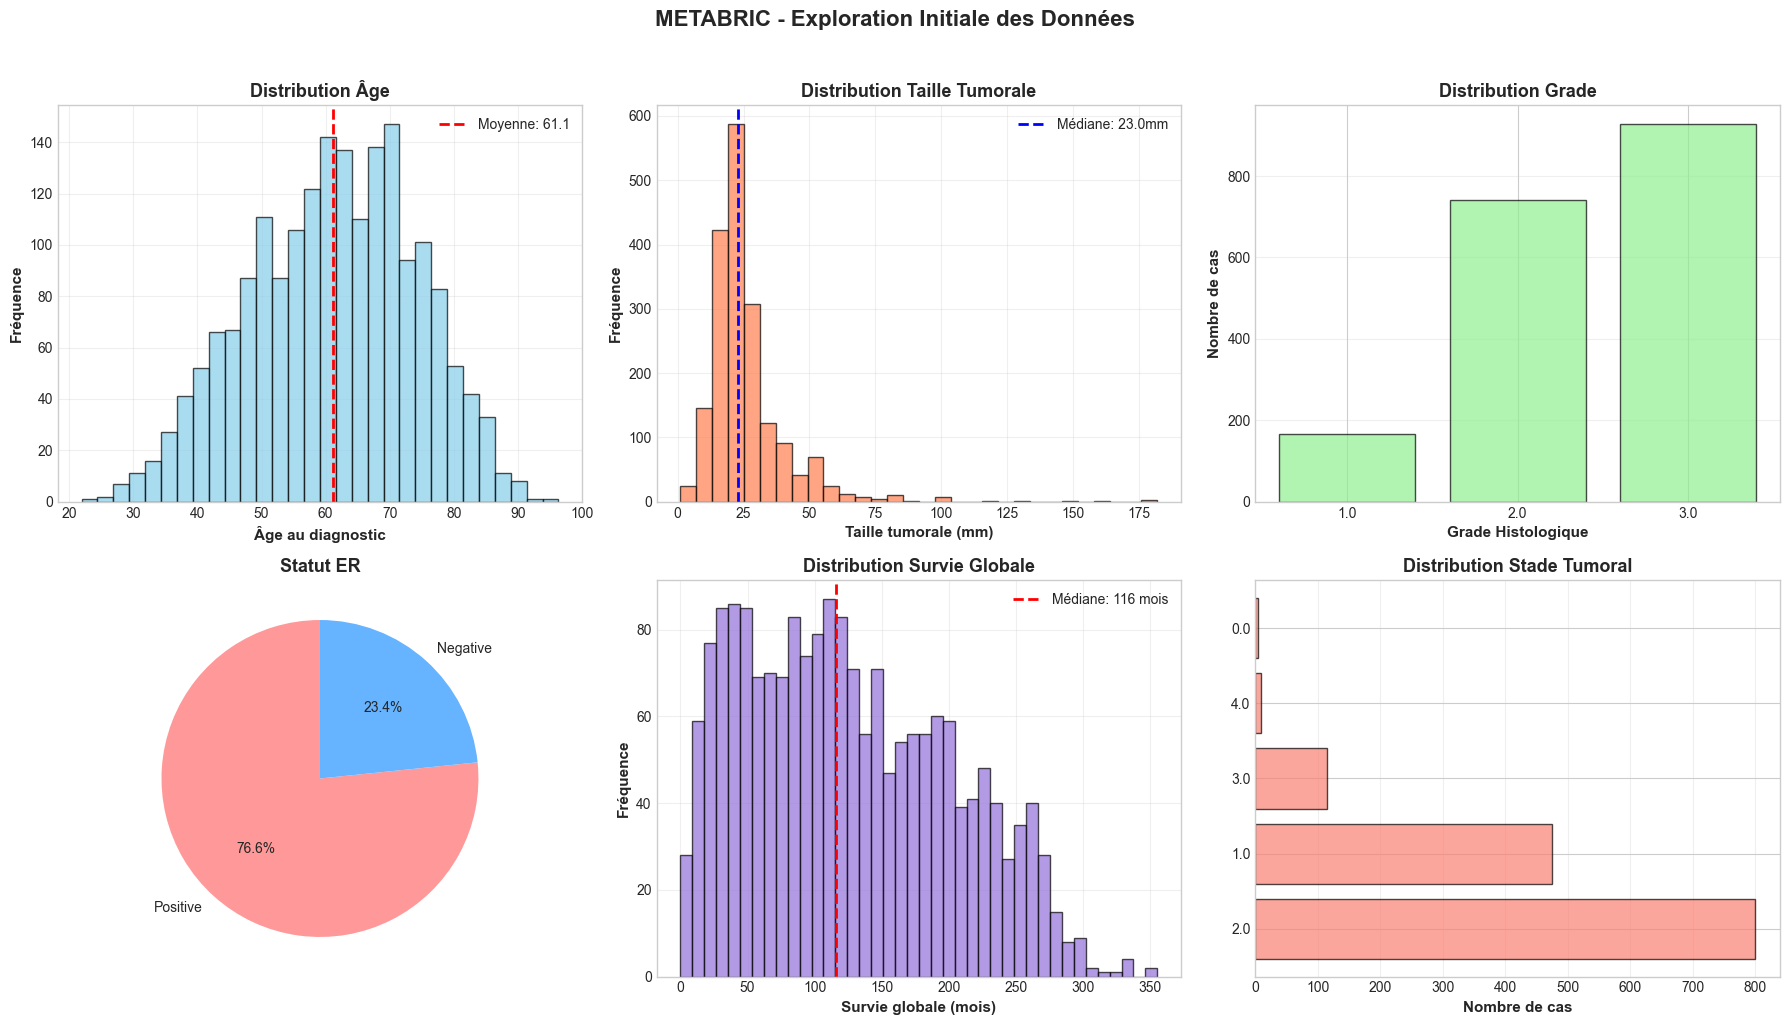


✅ Exploration terminée!


In [5]:
print("\n" + "="*80)
print("🔍 EXPLORATION DES DONNÉES")
print("="*80)


print("\n📊 INFORMATIONS GÉNÉRALES:")
print(f"   Nombre de patients: {len(df):,}")
print(f"   Nombre de colonnes: {len(df.columns)}")
print(f"   Mémoire utilisée: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Types de colonnes
print(f"\n📋 TYPES DE COLONNES:")
print(f"   Numériques: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"   Textuelles: {len(df.select_dtypes(include=['object']).columns)}")


print("\n📋 APERÇU DES PREMIÈRES LIGNES:")
display(df.head(3))


missing_total = df.isnull().sum().sum()
missing_pct = (missing_total / (df.shape[0] * df.shape[1])) * 100

print(f"\n❓ VALEURS MANQUANTES GLOBALES:")
print(f"   Total: {missing_total:,} ({missing_pct:.2f}%)")

# Top 20 colonnes avec plus de NaN
missing_cols = df.isnull().sum()
missing_cols = missing_cols[missing_cols > 0].sort_values(ascending=False)

if len(missing_cols) > 0:
    print(f"\n   Top 20 colonnes avec NaN:")
    for i, (col, count) in enumerate(missing_cols.head(20).items(), 1):
        pct = (count / len(df)) * 100
        print(f"   {i:2d}. {col:40s}: {count:5d} ({pct:5.1f}%)")
else:
    print("\n   ✅ Aucune valeur manquante détectée!")


print("\n" + "="*80)
print("📊 STATISTIQUES DES COLONNES CLÉS")
print("="*80)

# Colonnes cliniques essentielles
clinical_cols = [
    'age_at_diagnosis',
    'tumor_size',
    'tumor_stage',
    'neoplasm_histologic_grade',
    'lymph_nodes_examined_positive',
    'overall_survival_months',
    'nottingham_prognostic_index'
]

available_clinical = [col for col in clinical_cols if col in df.columns]

if available_clinical:
    print("\n📈 Variables Numériques Clés:")
    display(df[available_clinical].describe())
# Colonnes catégorielles
categorical_cols = [
    'er_status',
    'her2_status',
    'pr_status',
    'tumor_stage',
    'cellularity',
    'pam50_+_claudin-low_subtype',
    'integrative_cluster'
]

available_categorical = [col for col in categorical_cols if col in df.columns]

if available_categorical:
    print("\n📋 Variables Catégorielles Clés:")
    for col in available_categorical[:5]:  # Limiter à 5
        print(f"\n{col}:")
        print(df[col].value_counts().head())


print("\n📈 Génération des visualisations exploratoires...")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('METABRIC - Exploration Initiale des Données', 
             fontsize=16, fontweight='bold', y=1.02)

# Plot 1: Distribution âge
if 'age_at_diagnosis' in df.columns:
    age_data = df['age_at_diagnosis'].dropna()
    axes[0, 0].hist(age_data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(age_data.mean(), color='red', linestyle='--', 
                      linewidth=2, label=f'Moyenne: {age_data.mean():.1f}')
    axes[0, 0].set_xlabel('Âge au diagnostic', fontsize=11, fontweight='bold')
    axes[0, 0].set_ylabel('Fréquence', fontsize=11, fontweight='bold')
    axes[0, 0].set_title('Distribution Âge', fontsize=13, fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)

# Plot 2: Distribution taille tumorale
if 'tumor_size' in df.columns:
    size_data = pd.to_numeric(df['tumor_size'], errors='coerce').dropna()
    axes[0, 1].hist(size_data, bins=30, color='coral', edgecolor='black', alpha=0.7)
    axes[0, 1].axvline(size_data.median(), color='blue', linestyle='--', 
                      linewidth=2, label=f'Médiane: {size_data.median():.1f}mm')
    axes[0, 1].set_xlabel('Taille tumorale (mm)', fontsize=11, fontweight='bold')
    axes[0, 1].set_ylabel('Fréquence', fontsize=11, fontweight='bold')
    axes[0, 1].set_title('Distribution Taille Tumorale', fontsize=13, fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)

# Plot 3: Distribution grade
if 'neoplasm_histologic_grade' in df.columns:
    grade_data = df['neoplasm_histologic_grade'].value_counts().sort_index()
    axes[0, 2].bar(grade_data.index.astype(str), grade_data.values, 
                  color='lightgreen', edgecolor='black', alpha=0.7)
    axes[0, 2].set_xlabel('Grade Histologique', fontsize=11, fontweight='bold')
    axes[0, 2].set_ylabel('Nombre de cas', fontsize=11, fontweight='bold')
    axes[0, 2].set_title('Distribution Grade', fontsize=13, fontweight='bold')
    axes[0, 2].grid(alpha=0.3, axis='y')

# Plot 4: Statut ER
if 'er_status' in df.columns:
    er_data = df['er_status'].value_counts()
    colors = ['#ff9999', '#66b3ff']
    axes[1, 0].pie(er_data.values, labels=er_data.index, autopct='%1.1f%%',
                  startangle=90, colors=colors)
    axes[1, 0].set_title('Statut ER', fontsize=13, fontweight='bold')

# Plot 5: Survie globale
if 'overall_survival_months' in df.columns:
    surv_data = pd.to_numeric(df['overall_survival_months'], errors='coerce').dropna()
    axes[1, 1].hist(surv_data, bins=40, color='mediumpurple', edgecolor='black', alpha=0.7)
    axes[1, 1].axvline(surv_data.median(), color='red', linestyle='--', 
                      linewidth=2, label=f'Médiane: {surv_data.median():.0f} mois')
    axes[1, 1].set_xlabel('Survie globale (mois)', fontsize=11, fontweight='bold')
    axes[1, 1].set_ylabel('Fréquence', fontsize=11, fontweight='bold')
    axes[1, 1].set_title('Distribution Survie Globale', fontsize=13, fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(alpha=0.3)

# Plot 6: Stade tumoral
if 'tumor_stage' in df.columns:
    stage_data = df['tumor_stage'].value_counts().head(6)
    axes[1, 2].barh(range(len(stage_data)), stage_data.values, 
                   color='salmon', edgecolor='black', alpha=0.7)
    axes[1, 2].set_yticks(range(len(stage_data)))
    axes[1, 2].set_yticklabels(stage_data.index.astype(str))
    axes[1, 2].set_xlabel('Nombre de cas', fontsize=11, fontweight='bold')
    axes[1, 2].set_title('Distribution Stade Tumoral', fontsize=13, fontweight='bold')
    axes[1, 2].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n✅ Exploration terminée!")

In [6]:
print("\n" + "="*80)
print("🗑️ SUPPRESSION DES COLONNES INUTILES")
print("="*80)


COLUMNS_TO_KEEP = [
    # Identifiant (temporaire, sera supprimé plus tard)
    'patient_id',
    
    # Features cliniques essentielles
    'age_at_diagnosis',
    'tumor_size',
    'tumor_stage',
    'neoplasm_histologic_grade',
    'cellularity',
    'nottingham_prognostic_index',
    
    # Biomarqueurs
    'er_status',
    'her2_status',
    'pr_status',
    
    # Extension ganglionnaire
    'lymph_nodes_examined_positive',
    
    # Classification moléculaire
    'pam50_+_claudin-low_subtype',
    'integrative_cluster',
    '3-gene_classifier_subtype',
    
    # Mutations clés (optionnel)
    'mutation_count',
    'pik3ca_mut',
    'tp53_mut',
    'gata3_mut',
    'map3k1_mut',
    'cdh1_mut',
    
    # Variables pour créer les cibles
    'overall_survival_months',
    'overall_survival',
    'death_from_cancer'
]

# Vérifier présence
available_keep = [col for col in COLUMNS_TO_KEEP if col in df.columns]
missing_keep = [col for col in COLUMNS_TO_KEEP if col not in df.columns]

print(f"✅ Colonnes à garder disponibles: {len(available_keep)}/{len(COLUMNS_TO_KEEP)}")

if missing_keep:
    print(f"\n⚠️ Colonnes manquantes:")
    for col in missing_keep:
        print(f"   • {col}")

# Créer dataset réduit
metabric_selected = df[available_keep].copy()

print(f"\n📊 Réduction du dataset:")
print(f"   Avant: {df.shape[1]} colonnes")
print(f"   Après: {metabric_selected.shape[1]} colonnes")
print(f"   Supprimées: {df.shape[1] - metabric_selected.shape[1]} colonnes")

# Identifier colonnes avec >80% de NaN (à supprimer)
high_nan_threshold = 0.8
high_nan_cols = []

for col in metabric_selected.columns:
    nan_pct = metabric_selected[col].isnull().sum() / len(metabric_selected)
    if nan_pct > high_nan_threshold:
        high_nan_cols.append((col, nan_pct))

if high_nan_cols:
    print(f"\n⚠️ Colonnes avec >{high_nan_threshold*100}% de NaN (à supprimer):")
    for col, pct in high_nan_cols:
        print(f"   • {col}: {pct*100:.1f}%")
    
    # Supprimer ces colonnes
    cols_to_drop = [col for col, _ in high_nan_cols]
    metabric_selected = metabric_selected.drop(columns=cols_to_drop)
    
    print(f"\n✅ {len(cols_to_drop)} colonnes supprimées")
    print(f"   Shape final: {metabric_selected.shape}")
else:
    print(f"\n✅ Aucune colonne avec >{high_nan_threshold*100}% de NaN")

print("\n✅ Sélection des colonnes terminée!")


🗑️ SUPPRESSION DES COLONNES INUTILES
✅ Colonnes à garder disponibles: 23/23

📊 Réduction du dataset:
   Avant: 693 colonnes
   Après: 23 colonnes
   Supprimées: 670 colonnes

✅ Aucune colonne avec >80.0% de NaN

✅ Sélection des colonnes terminée!



🧹 NETTOYAGE DES DONNÉES

📊 TRAITEMENT DES VALEURS MANQUANTES:
   NaN avant nettoyage: 897

🔢 Imputation variables numériques (médiane):
   ✓ tumor_size                              :   20 NaN → médiane=23.00
   ✓ mutation_count                          :   45 NaN → médiane=5.00

📋 Imputation variables catégorielles (mode ou Unknown):
   ✓ tumor_stage                             :  501 NaN → mode='2.0'
   ✓ neoplasm_histologic_grade               :   72 NaN → mode='3.0'
   ✓ cellularity                             :   54 NaN → mode='High'
   ✓ 3-gene_classifier_subtype               :  204 NaN → mode='ER+/HER2- Low Prolif'

🧬 Imputation variables mutations (0):

✅ NaN après imputation: 1

🔍 DÉTECTION DES VALEURS ABERRANTES (IQR Method)

📊 Traitement des outliers:
     OK age_at_diagnosis                        :    1 outliers (  0.1%)
   ✓ TRAITÉ tumor_size                              :  142 outliers (  7.5%)
   ✓ TRAITÉ lymph_nodes_examined_positive           :  210 outliers ( 11.0%)

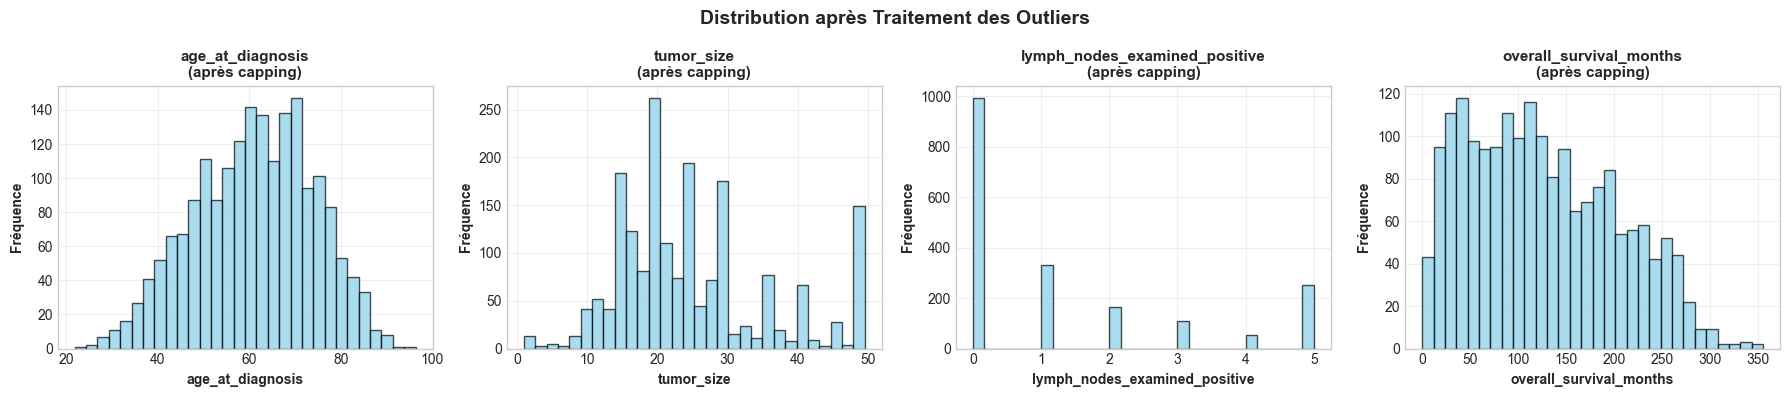


✅ Nettoyage terminé!
   Shape final: (1904, 23)


In [7]:
print("\n" + "="*80)
print("🧹 NETTOYAGE DES DONNÉES")
print("="*80)

metabric_clean = metabric_selected.copy()


print("\n📊 TRAITEMENT DES VALEURS MANQUANTES:")
print(f"   NaN avant nettoyage: {metabric_clean.isnull().sum().sum()}")


numeric_cols = [
    'age_at_diagnosis',
    'tumor_size',
    'lymph_nodes_examined_positive',
    'nottingham_prognostic_index',
    'overall_survival_months',
    'mutation_count'
]

available_numeric = [col for col in numeric_cols if col in metabric_clean.columns]

print("\n🔢 Imputation variables numériques (médiane):")
for col in available_numeric:
    nan_before = metabric_clean[col].isnull().sum()
    if nan_before > 0:
        # Convertir en numérique
        metabric_clean[col] = pd.to_numeric(metabric_clean[col], errors='coerce')
        # Imputer par médiane
        median_val = metabric_clean[col].median()
        metabric_clean[col].fillna(median_val, inplace=True)
        print(f"   ✓ {col:40s}: {nan_before:4d} NaN → médiane={median_val:.2f}")


categorical_cols = [
    'tumor_stage',
    'neoplasm_histologic_grade',
    'cellularity',
    'er_status',
    'her2_status',
    'pr_status',
    'pam50_+_claudin-low_subtype',
    'integrative_cluster',
    '3-gene_classifier_subtype'
]

available_categorical = [col for col in categorical_cols if col in metabric_clean.columns]

print("\n📋 Imputation variables catégorielles (mode ou Unknown):")
for col in available_categorical:
    nan_before = metabric_clean[col].isnull().sum()
    if nan_before > 0:
        # Imputer par mode si suffisamment de données, sinon 'Unknown'
        if metabric_clean[col].notna().sum() > 10:
            mode_val = metabric_clean[col].mode()[0] if len(metabric_clean[col].mode()) > 0 else 'Unknown'
        else:
            mode_val = 'Unknown'
        
        metabric_clean[col].fillna(mode_val, inplace=True)
        print(f"   ✓ {col:40s}: {nan_before:4d} NaN → mode='{mode_val}'")


mutation_cols = [col for col in metabric_clean.columns if col.endswith('_mut')]

if mutation_cols:
    print(f"\n🧬 Imputation variables mutations (0):")
    for col in mutation_cols:
        nan_before = metabric_clean[col].isnull().sum()
        if nan_before > 0:
            metabric_clean[col].fillna(0, inplace=True)
            print(f"   ✓ {col:40s}: {nan_before:4d} NaN → 0")

print(f"\n✅ NaN après imputation: {metabric_clean.isnull().sum().sum()}")


print("\n" + "="*80)
print("🔍 DÉTECTION DES VALEURS ABERRANTES (IQR Method)")
print("="*80)

def detect_and_cap_outliers(df, column, cap_method='iqr', visualize=False):
    """
    Détecter et traiter les outliers
    
    cap_method:
        - 'iqr': IQR method (Q1-1.5*IQR, Q3+1.5*IQR)
        - 'percentile': Cap at 1st and 99th percentile
    """
    
    data = df[column].copy()
    
    if cap_method == 'iqr':
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    else:  # percentile
        lower_bound = data.quantile(0.01)
        upper_bound = data.quantile(0.99)
    
    # Compter outliers
    outliers_low = (data < lower_bound).sum()
    outliers_high = (data > upper_bound).sum()
    total_outliers = outliers_low + outliers_high
    pct_outliers = (total_outliers / len(data)) * 100
    
    # Traiter outliers (winsorization)
    data_capped = data.clip(lower=lower_bound, upper=upper_bound)
    
    return data_capped, {
        'n_outliers': total_outliers,
        'pct': pct_outliers,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'n_low': outliers_low,
        'n_high': outliers_high
    }

# Colonnes à vérifier pour outliers
outlier_check_cols = [
    'age_at_diagnosis',
    'tumor_size',
    'lymph_nodes_examined_positive',
    'overall_survival_months'
]

available_outlier = [col for col in outlier_check_cols if col in metabric_clean.columns]

outlier_summary = []

print("\n📊 Traitement des outliers:")
for col in available_outlier:
    data_capped, stats = detect_and_cap_outliers(metabric_clean, col, cap_method='iqr')
    
    if stats['pct'] > 5:  # Si >5% d'outliers, appliquer capping
        metabric_clean[col] = data_capped
        status = "✓ TRAITÉ"
    else:
        status = "  OK"
    
    outlier_summary.append({
        'Colonne': col,
        'N_Outliers': stats['n_outliers'],
        'Pourcentage': f"{stats['pct']:.1f}%",
        'Lower_Bound': f"{stats['lower_bound']:.2f}",
        'Upper_Bound': f"{stats['upper_bound']:.2f}",
        'Statut': status
    })
    
    print(f"   {status} {col:40s}: {stats['n_outliers']:4d} outliers ({stats['pct']:5.1f}%)")

# Visualiser outliers
if len(outlier_summary) > 0:
    fig, axes = plt.subplots(1, min(4, len(available_outlier)), figsize=(18, 4))
    if len(available_outlier) == 1:
        axes = [axes]
    
    fig.suptitle('Distribution après Traitement des Outliers', 
                 fontsize=14, fontweight='bold')
    
    for idx, col in enumerate(available_outlier[:4]):
        ax = axes[idx] if len(available_outlier) > 1 else axes[0]
        
        metabric_clean[col].hist(bins=30, ax=ax, color='skyblue', edgecolor='black', alpha=0.7)
        ax.set_xlabel(col, fontsize=10, fontweight='bold')
        ax.set_ylabel('Fréquence', fontsize=10, fontweight='bold')
        ax.set_title(f'{col}\n(après capping)', fontsize=11, fontweight='bold')
        ax.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("\n✅ Nettoyage terminé!")
print(f"   Shape final: {metabric_clean.shape}")

In [8]:
print("\n" + "="*80)
print("🔧 FEATURE ENGINEERING")
print("="*80)

metabric_engineered = metabric_clean.copy()


print("\n📊 ENCODAGE DES VARIABLES CATÉGORIELLES:")

# Grade histologique (1/2/3 → numérique)
if 'neoplasm_histologic_grade' in metabric_engineered.columns:
    metabric_engineered['grade'] = pd.to_numeric(
        metabric_engineered['neoplasm_histologic_grade'], 
        errors='coerce'
    ).fillna(2).clip(1, 3).astype(int)
    print("   ✓ grade (1/2/3)")

# Stade tumoral (I/II/III/IV → 0/1/2/3)
# Stade tumoral (I/II/III/IV → 0/1/2/3) - VERSION AMÉLIORÉE
if 'tumor_stage' in metabric_engineered.columns:
    
    # Afficher les valeurs uniques AVANT mapping
    print(f"\n   📊 Valeurs uniques de tumor_stage AVANT mapping:")
    print(f"   {metabric_engineered['tumor_stage'].value_counts().head(10)}")
    
    # Nettoyer la colonne : enlever espaces, convertir en majuscules
    metabric_engineered['tumor_stage_clean'] = (
        metabric_engineered['tumor_stage']
        .astype(str)
        .str.strip()           # Enlever espaces
        .str. upper()           # Tout en majuscules
        .str.replace('STAGE ', '')  # Enlever "STAGE"
        .str.replace('. 0', '')      # Enlever ".0" (ex: "1.0" → "1")
    )
    
    # Mapping étendu
    stage_map = {
        # Stade 0
        '0': 0, 'STAGE 0': 0,
        
        # Stade I
        '1': 0, 'I': 0, 'STAGE 1': 0, 'STAGE I': 0,
        
        # Stade II
        '2': 1, 'II': 1, 'IIA': 1, 'IIB': 1,
        'STAGE 2': 1, 'STAGE II': 1, 'STAGE IIA': 1, 'STAGE IIB': 1,
        '2A': 1, '2B': 1,
        
        # Stade III
        '3': 2, 'III': 2, 'IIIA': 2, 'IIIB': 2, 'IIIC': 2,
        'STAGE 3': 2, 'STAGE III': 2, 'STAGE IIIA': 2, 'STAGE IIIB': 2, 'STAGE IIIC': 2,
        '3A': 2, '3B': 2, '3C': 2,
        
        # Stade IV
        '4': 3, 'IV': 3, 'STAGE 4': 3, 'STAGE IV': 3
    }
    
    # Appliquer le mapping
    metabric_engineered['stage_encoded'] = metabric_engineered['tumor_stage_clean'].map(stage_map)
    
    # Pour les valeurs non mappées, essayer conversion directe en numérique
    unmapped_mask = metabric_engineered['stage_encoded']. isna()
    n_unmapped = unmapped_mask.sum()
    
    if n_unmapped > 0:
        print(f"\n   ⚠️ {n_unmapped} valeurs non mappées, tentative conversion numérique...")
        
        # Essayer de convertir directement en numérique et clipper entre 0-3
        numeric_stages = pd.to_numeric(
            metabric_engineered. loc[unmapped_mask, 'tumor_stage_clean'], 
            errors='coerce'
        ). clip(0, 3)
        
        metabric_engineered.loc[unmapped_mask, 'stage_encoded'] = numeric_stages
    
    # Remplir les NaN restants avec la médiane
    still_nan = metabric_engineered['stage_encoded'].isna(). sum()
    if still_nan > 0:
        median_stage = metabric_engineered['stage_encoded'].median()
        print(f"\n   ⚠️ {still_nan} valeurs encore manquantes → remplissage avec médiane ({median_stage})")
        metabric_engineered['stage_encoded'].fillna(median_stage, inplace=True)
    
    # Convertir en entier
    metabric_engineered['stage_encoded'] = metabric_engineered['stage_encoded'].astype(int)
    
    # Afficher résultat
    print(f"\n   ✅ stage_encoded créé:")
    print(f"      Valeurs uniques: {sorted(metabric_engineered['stage_encoded'].unique())}")
    print(f"      Distribution:")
    stage_dist = metabric_engineered['stage_encoded'].value_counts(). sort_index()
    for stage, count in stage_dist.items():
        print(f"         Stage {stage}: {count} ({count/len(metabric_engineered)*100:.1f}%)")
    
    print("   ✓ stage_encoded (0/1/2/3)")

# Cellularité (Low/Moderate/High → 0/1/2)
if 'cellularity' in metabric_engineered.columns:
    cellularity_map = {'Low': 0, 'Moderate': 1, 'High': 2}
    metabric_engineered['cellularity_encoded'] = metabric_engineered['cellularity'].map(cellularity_map)
    metabric_engineered['cellularity_encoded'] = metabric_engineered['cellularity_encoded'].fillna(1).astype(int)
    print("   ✓ cellularity_encoded (0/1/2)")

# Statuts récepteurs (Positive/Negative → 1/0)
for receptor in ['er_status', 'her2_status', 'pr_status']:
    if receptor in metabric_engineered.columns:
        metabric_engineered[f'{receptor}_binary'] = metabric_engineered[receptor].astype(str).str.lower().isin(
            ['positive', 'pos', '+', '1']
        ).astype(int)
        print(f"   ✓ {receptor}_binary (0/1)")

# Sous-types moléculaires (LabelEncoder)
le = LabelEncoder()

molecular_subtypes = [
    'pam50_+_claudin-low_subtype',
    'integrative_cluster',
    '3-gene_classifier_subtype'
]

for subtype in molecular_subtypes:
    if subtype in metabric_engineered.columns:
        # Remplir NaN
        metabric_engineered[subtype] = metabric_engineered[subtype].fillna('Unknown').astype(str)
        # Encoder
        metabric_engineered[f'{subtype}_encoded'] = le.fit_transform(metabric_engineered[subtype])
        print(f"   ✓ {subtype}_encoded")


# 5.2 Création de features dérivées
print("\n🔬 CRÉATION DE FEATURES DÉRIVÉES:")

# Feature 1: Ratio ganglions positifs
if 'lymph_nodes_examined_positive' in metabric_engineered.columns:
    max_lymph = metabric_engineered['lymph_nodes_examined_positive'].max()
    metabric_engineered['lymph_node_ratio'] = (
        metabric_engineered['lymph_nodes_examined_positive'] / (max_lymph + 1)
    )
    print("   ✓ lymph_node_ratio (0-1)")

# Feature 2: Score récepteurs hormonaux
if all(col in metabric_engineered.columns for col in ['er_status_binary', 'pr_status_binary', 'her2_status_binary']):
    metabric_engineered['hormone_receptor_score'] = (
        metabric_engineered['er_status_binary'] + 
        metabric_engineered['pr_status_binary'] - 
        metabric_engineered['her2_status_binary']
    )
    print("   ✓ hormone_receptor_score (-1 à 2)")

# Feature 3: Triple négatif (ER-, PR-, HER2-)
if all(col in metabric_engineered.columns for col in ['er_status_binary', 'pr_status_binary', 'her2_status_binary']):
    metabric_engineered['triple_negative'] = (
        (metabric_engineered['er_status_binary'] == 0) & 
        (metabric_engineered['pr_status_binary'] == 0) & 
        (metabric_engineered['her2_status_binary'] == 0)
    ).astype(int)
    print("   ✓ triple_negative (0/1)")

# Feature 4: Catégorie âge
if 'age_at_diagnosis' in metabric_engineered.columns:
    bins = [0, 40, 55, 70, 100]
    labels = [0, 1, 2, 3]  # Jeune, Moyenne, Âgée, Très âgée
    metabric_engineered['age_category'] = pd.cut(
        metabric_engineered['age_at_diagnosis'], 
        bins=bins, 
        labels=labels
    ).astype(int)
    print("   ✓ age_category (0-3)")

# Feature 5: Catégorie taille tumorale
if 'tumor_size' in metabric_engineered.columns:
    # T1 (<20mm), T2 (20-50mm), T3 (>50mm)
    bins = [0, 20, 50, 1000]
    labels = [0, 1, 2]
    metabric_engineered['size_category'] = pd.cut(
        metabric_engineered['tumor_size'], 
        bins=bins, 
        labels=labels
    ).astype(int)
    print("   ✓ size_category (0-2)")

# Feature 6: Interaction Grade × Stage
if 'grade' in metabric_engineered.columns and 'stage_encoded' in metabric_engineered.columns:
    metabric_engineered['grade_stage_interaction'] = (
        metabric_engineered['grade'] * metabric_engineered['stage_encoded']
    )
    print("   ✓ grade_stage_interaction")

# Feature 7: Risque élevé (combinaison facteurs)
risk_features = ['grade', 'stage_encoded', 'triple_negative', 'lymph_nodes_examined_positive']
available_risk = [f for f in risk_features if f in metabric_engineered.columns]

if len(available_risk) >= 3:
    metabric_engineered['high_risk'] = 0
    
    if 'grade' in metabric_engineered.columns:
        metabric_engineered.loc[metabric_engineered['grade'] == 3, 'high_risk'] += 1
    
    if 'stage_encoded' in metabric_engineered.columns:
        metabric_engineered.loc[metabric_engineered['stage_encoded'] >= 2, 'high_risk'] += 1
    
    if 'triple_negative' in metabric_engineered.columns:
        metabric_engineered.loc[metabric_engineered['triple_negative'] == 1, 'high_risk'] += 1
    
    if 'lymph_nodes_examined_positive' in metabric_engineered.columns:
        metabric_engineered.loc[metabric_engineered['lymph_nodes_examined_positive'] > 3, 'high_risk'] += 1
    
    print("   ✓ high_risk (0-4)")

print(f"\n✅ Feature Engineering terminé!")
print(f"   Shape: {metabric_engineered.shape}")


🔧 FEATURE ENGINEERING

📊 ENCODAGE DES VARIABLES CATÉGORIELLES:
   ✓ grade (1/2/3)

   📊 Valeurs uniques de tumor_stage AVANT mapping:
   tumor_stage
2.0    1301
1.0     475
3.0     115
4.0       9
0.0       4
Name: count, dtype: int64

   ⚠️ 1904 valeurs non mappées, tentative conversion numérique...

   ✅ stage_encoded créé:
      Valeurs uniques: [0, 1, 2, 3]
      Distribution:
         Stage 0: 4 (0.2%)
         Stage 1: 475 (24.9%)
         Stage 2: 1301 (68.3%)
         Stage 3: 124 (6.5%)
   ✓ stage_encoded (0/1/2/3)
   ✓ cellularity_encoded (0/1/2)
   ✓ er_status_binary (0/1)
   ✓ her2_status_binary (0/1)
   ✓ pr_status_binary (0/1)
   ✓ pam50_+_claudin-low_subtype_encoded
   ✓ integrative_cluster_encoded
   ✓ 3-gene_classifier_subtype_encoded

🔬 CRÉATION DE FEATURES DÉRIVÉES:
   ✓ lymph_node_ratio (0-1)
   ✓ hormone_receptor_score (-1 à 2)
   ✓ triple_negative (0/1)
   ✓ age_category (0-3)
   ✓ size_category (0-2)
   ✓ grade_stage_interaction
   ✓ high_risk (0-4)

✅ Feature E

In [16]:
print("\n" + "="*80)
print("🎯 CRÉATION DES VARIABLES CIBLES")
print("="*80)

def create_target_variables(df):
    """Créer les 3 variables cibles"""
    
    targets = pd.DataFrame(index=df.index)
    
    # ════════════════════════════════════════════════════════════════════
    # CIBLE 1: Aggressiveness Score (1-10) - INCHANGÉ ✅
    # ════════════════════════════════════════════════════════════════════
    
    print("\n1️⃣ Aggressiveness Score (1-10):")
    
    score_components = []
    
    # Grade (0-3 points)
    if 'grade' in df.columns:
        grade_score = (df['grade'] - 1)  # 0, 1, 2
        score_components. append(grade_score)
        print("   ✓ Grade (0-2 points)")
    
    # Stage (0-3 points)
    if 'stage_encoded' in df. columns:
        stage_score = df['stage_encoded'] * 1.5  # 0, 1.5, 3, 4.5
        score_components.append(stage_score)
        print("   ✓ Stage (0-4.5 points)")
    
    # Récepteurs hormonaux (0-2 points)
    if all(c in df.columns for c in ['er_status_binary', 'her2_status_binary']):
        receptor_score = (
            (df['er_status_binary'] == 0).astype(int) +  # ER- = +1
            (df['her2_status_binary'] == 1). astype(int)  # HER2+ = +1
        )
        score_components.append(receptor_score)
        print("   ✓ Récepteurs (0-2 points)")
    
    # Taille tumorale (0-2 points)
    if 'tumor_size' in df.columns:
        size_score = np.clip(df['tumor_size'] / 25, 0, 2)
        score_components.append(size_score)
        print("   ✓ Taille (0-2 points)")
    
    # Ganglions (0-2 points)
    if 'lymph_nodes_examined_positive' in df.columns:
        lymph_score = np.clip(df['lymph_nodes_examined_positive'] / 5, 0, 2)
        score_components.append(lymph_score)
        print("   ✓ Ganglions (0-2 points)")
    
    # Combiner et normaliser 1-10
    if score_components:
        raw_score = sum(score_components)
        min_val = raw_score.min()
        max_val = raw_score.max()
        
        if max_val > min_val:
            targets['aggressiveness_score'] = 1 + ((raw_score - min_val) / (max_val - min_val)) * 9
        else:
            targets['aggressiveness_score'] = 5.5
        
        print(f"   ✅ Créé - Moyenne: {targets['aggressiveness_score'].mean():.2f}")
    else:
        targets['aggressiveness_score'] = 5.5
        print("   ⚠️ Valeur par défaut")
    
    # ════════════════════════════════════════════════════════════════════
    # CIBLE 2: Growth Rate (%/mois) - VERSION AMÉLIORÉE ⭐ MODIFIÉ
    # ════════════════════════════════════════════════════════════════════
    
    print("\n2️⃣ Growth Rate (%/mois) - VERSION AMÉLIORÉE:")
    
    # Normaliser les features principales
    if 'tumor_size' in df.columns:
        tumor_size_norm = df['tumor_size'] / df['tumor_size'].max()
    else:
        tumor_size_norm = 0.5
    
    if 'grade' in df.columns:
        grade_norm = (df['grade'] - 1) / 2  # Grade 1-3 → 0-1
    else:
        grade_norm = 0.5
    
    # Composante de base (taille × grade)
    base_component = tumor_size_norm * 15 + grade_norm * 20
    
    # Ajustements selon biomarqueurs
    biomarker_adjustment = pd.Series(0, index=df.index)
    
    # Triple négatif (très agressif, croissance rapide)
    if 'triple_negative' in df.columns:
        biomarker_adjustment += df['triple_negative'] * 10
        print("   ✓ Triple négatif pris en compte")
    elif all(c in df.columns for c in ['er_status_binary', 'her2_status_binary', 'pr_status_binary']):
        triple_neg = (
            (df['er_status_binary'] == 0) & 
            (df['her2_status_binary'] == 0) & 
            (df['pr_status_binary'] == 0)
        ). astype(int)
        biomarker_adjustment += triple_neg * 10
        print("   ✓ Triple négatif calculé")
    
    # HER2+ (croissance rapide)
    if 'her2_status_binary' in df.columns:
        biomarker_adjustment += df['her2_status_binary'] * 6
        print("   ✓ HER2 status pris en compte")
    
    # Métastases ganglionnaires (indicateur d'agressivité)
    if 'lymph_nodes_examined_positive' in df.columns:
        lymph_norm = np.clip(df['lymph_nodes_examined_positive'] / 10, 0, 1)
        biomarker_adjustment += lymph_norm * 8
        print("   ✓ Ganglions pris en compte")
    
    # ER- (plus agressif)
    if 'er_status_binary' in df.columns:
        biomarker_adjustment += (1 - df['er_status_binary']) * 4
        print("   ✓ ER status pris en compte")
    
    # Combiner les composantes
    growth_rate_base = base_component + biomarker_adjustment
    
    # Ajouter variabilité biologique réaliste (bruit gaussien)
    np.random.seed(42)  # Pour reproductibilité
    biological_noise = np.random.normal(0, 3, len(growth_rate_base))
    growth_rate_with_noise = growth_rate_base + biological_noise
    
    # Mettre sur échelle réaliste (1-50 %/mois)
    if growth_rate_with_noise. max() > growth_rate_with_noise.min():
        growth_rate_scaled = ((growth_rate_with_noise - growth_rate_with_noise. min()) / 
                              (growth_rate_with_noise.max() - growth_rate_with_noise.min())) * 48 + 1
    else:
        growth_rate_scaled = 25.0  # Valeur moyenne par défaut
    
    # Clipper pour éviter valeurs aberrantes
    targets['growth_rate'] = growth_rate_scaled.clip(1, 50)
    
    print(f"   ✅ Créé avec nouvelle formule")
    print(f"      Min:     {targets['growth_rate'].min():.2f} %/mois")
    print(f"      Max:     {targets['growth_rate'].max():.2f} %/mois")
    print(f"      Moyenne: {targets['growth_rate'].mean():.2f} %/mois")
    print(f"      Médiane: {targets['growth_rate'].median():.2f} %/mois")
    print(f"      Std:     {targets['growth_rate'].std():.2f}")
    
    # Diagnostic : vérifier corrélation avec tumor_size
    if 'tumor_size' in df.columns:
        corr_size = targets['growth_rate'].corr(df['tumor_size'])
        print(f"      Corr tumor_size: {corr_size:.4f}", end='')
        if corr_size < 0.70:
            print(" ✅ (bonne diversité)")
        else:
            print(" ⚠️ (encore élevée)")
    
    # Diagnostic : vérifier corrélation avec survival
    if 'overall_survival_months' in df.columns:
        corr_surv = targets['growth_rate'].corr(df['overall_survival_months'])
        print(f"      Corr survival:   {corr_surv:.4f}", end='')
        if abs(corr_surv) < 0.50:
            print(" ✅ (indépendant)")
        else:
            print(" ⚠️ (corrélation)")
    
    # ════════════════════════════════════════════════════════════════════
    # CIBLE 3: Evolution 6 Mois (0/1/2) - INCHANGÉ ✅
    # ════════════════════════════════════════════════════════════════════
    
    print("\n3️⃣ Evolution 6 Mois (0=Stable, 1=Modéré, 2=Rapide):")
    
    if 'overall_survival_months' in df.columns and 'overall_survival' in df.columns:
        surv_months = df['overall_survival_months']
        deceased = df['overall_survival'] == 1
        
        conditions = [
            (surv_months <= 6) | ((surv_months <= 24) & deceased),  # Rapide
            (surv_months > 6) & (surv_months <= 24),               # Modéré
        ]
        targets['evolution_6m'] = np.select(conditions, [2, 1], default=0)
        
        print("   ✅ Calculé depuis survie")
    else:
        # Basé sur score d'agressivité
        conditions = [
            targets['aggressiveness_score'] >= 7,
            targets['aggressiveness_score'] >= 4,
        ]
        targets['evolution_6m'] = np.select(conditions, [2, 1], default=0)
        print("   ✅ Estimé via aggressiveness_score")
    
    # Distribution
    evol_counts = targets['evolution_6m'].value_counts().sort_index()
    print(f"\n   Distribution:")
    print(f"      Stable (0):  {evol_counts.get(0, 0):4d} ({evol_counts.get(0, 0)/len(targets)*100:5.1f}%)")
    print(f"      Modéré (1):  {evol_counts.get(1, 0):4d} ({evol_counts.get(1, 0)/len(targets)*100:5.1f}%)")
    print(f"      Rapide (2):  {evol_counts.get(2, 0):4d} ({evol_counts.get(2, 0)/len(targets)*100:5.1f}%)")
    
    return targets

# Créer les cibles
y_metabric = create_target_variables(metabric_engineered)

print(f"\n{'='*80}")
print(f"✅ VARIABLES CIBLES CRÉÉES (VERSION AMÉLIORÉE)")
print(f"{'='*80}")
print(f"   Shape: {y_metabric.shape}")
print(f"\n   Résumé des 3 cibles :")
for col in y_metabric.columns:
    print(f"      • {col:25s} : min={y_metabric[col].min():.2f}, max={y_metabric[col].max():.2f}, mean={y_metabric[col].mean():.2f}")


🎯 CRÉATION DES VARIABLES CIBLES

1️⃣ Aggressiveness Score (1-10):
   ✓ Grade (0-2 points)
   ✓ Stage (0-4.5 points)
   ✓ Récepteurs (0-2 points)
   ✓ Taille (0-2 points)
   ✓ Ganglions (0-2 points)
   ✅ Créé - Moyenne: 4.83

2️⃣ Growth Rate (%/mois) - VERSION AMÉLIORÉE:
   ✓ Triple négatif pris en compte
   ✓ HER2 status pris en compte
   ✓ Ganglions pris en compte
   ✓ ER status pris en compte
   ✅ Créé avec nouvelle formule
      Min:     1.00 %/mois
      Max:     49.00 %/mois
      Moyenne: 23.06 %/mois
      Médiane: 22.79 %/mois
      Std:     9.12
      Corr tumor_size: 0.4326 ✅ (bonne diversité)
      Corr survival:   -0.2178 ✅ (indépendant)

3️⃣ Evolution 6 Mois (0=Stable, 1=Modéré, 2=Rapide):
   ✅ Calculé depuis survie

   Distribution:
      Stable (0):  1759 ( 92.4%)
      Modéré (1):   108 (  5.7%)
      Rapide (2):    37 (  1.9%)

✅ VARIABLES CIBLES CRÉÉES (VERSION AMÉLIORÉE)
   Shape: (1904, 3)

   Résumé des 3 cibles :
      • aggressiveness_score      : min=1.00, max=


🔧 PRÉ-TRAITEMENT : CONVERSION MUTATIONS EN BINAIRE
   ✓ pik3ca_mut          : [0 1]
   ✓ tp53_mut            : [0 1]
   ✓ gata3_mut           : [0 1]
   ✓ map3k1_mut          : [0 1]
   ✓ cdh1_mut            : [0 1]

✅ Mutations converties en binaire

📊 SÉLECTION DES FEATURES FINALES

✅ Features finales disponibles: 26/26

🔍 Vérification des types de données:
   ✅ Toutes les colonnes sont numériques

📊 Matrice X finale:
   Shape: (1904, 26)
   Features: 26

🔗 ANALYSE DE CORRÉLATION

⚠️ CORRÉLATIONS ÉLEVÉES DÉTECTÉES (|r| > 0.9):
   • age_at_diagnosis               ↔ age_category                  :  0.940
   • lymph_nodes_examined_positive  ↔ lymph_node_ratio              :  1.000

💡 Recommandation: Supprimer une des features corrélées

🗑️ Suppression automatique de 2 features:
   • lymph_node_ratio
   • age_category

   Shape après suppression: (1904, 24)

📊 Génération matrice de corrélation...


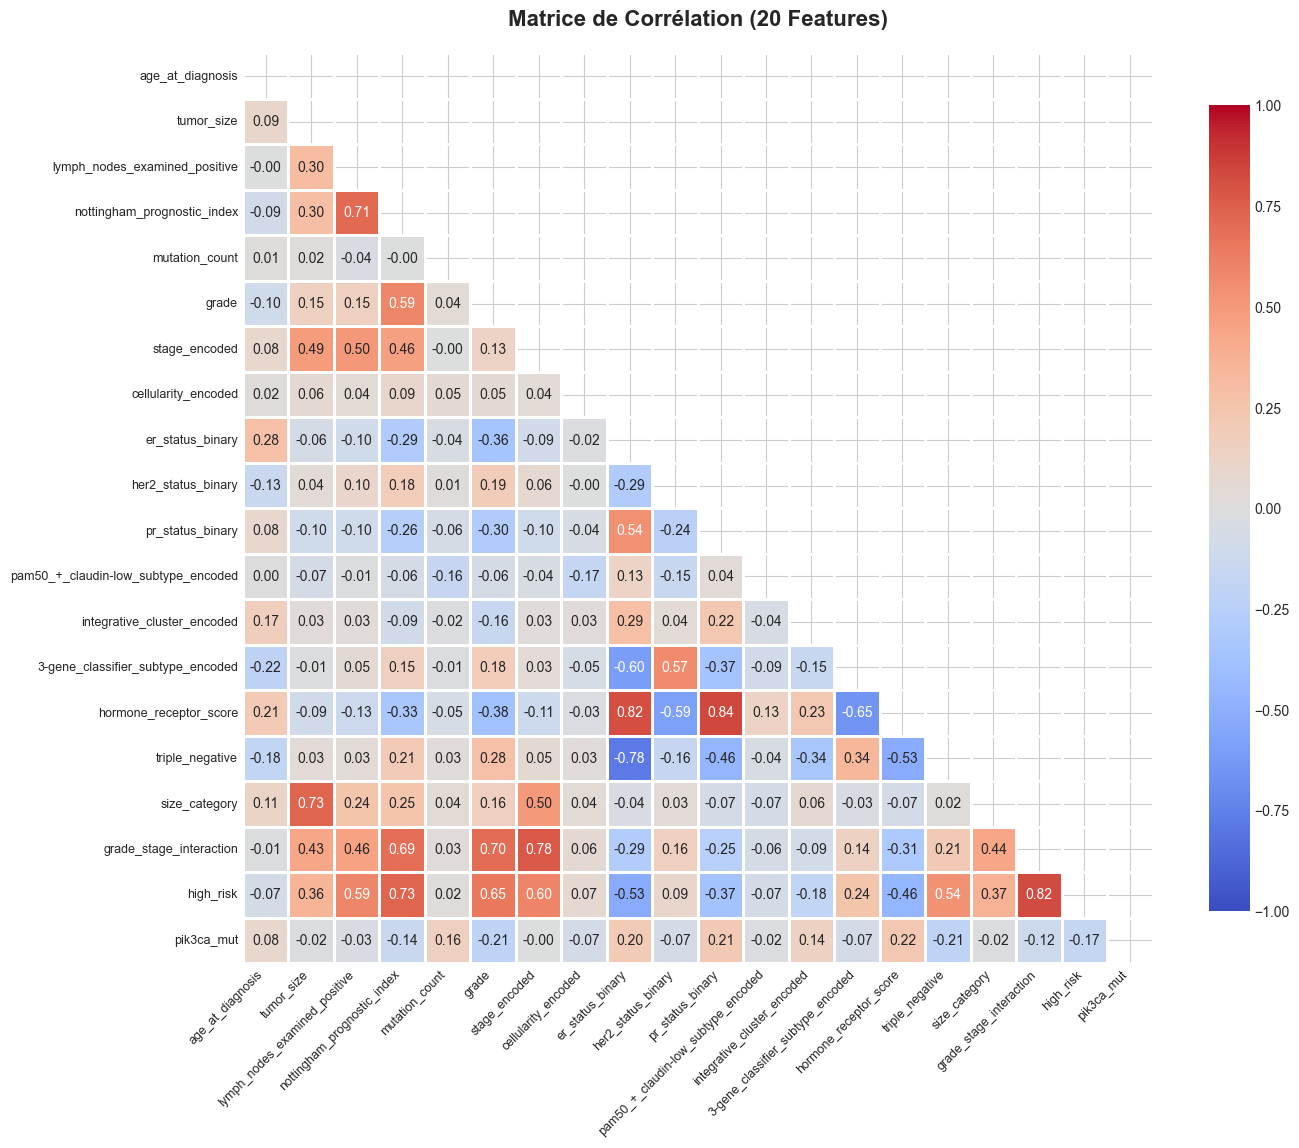


✅ Analyse de corrélation terminée!


In [17]:
print("\n" + "="*80)
print("🔧 PRÉ-TRAITEMENT : CONVERSION MUTATIONS EN BINAIRE")
print("="*80)

# ═══════════════════════════════════════════════════════════════════════════
# FIX: Convertir colonnes mutations en binaire
# ═══════════════════════════════════════════════════════════════════════════

mutation_cols = ['pik3ca_mut', 'tp53_mut', 'gata3_mut', 'map3k1_mut', 'cdh1_mut']

for col in mutation_cols:
    if col in metabric_engineered.columns:
        # Convertir en binaire
        metabric_engineered[col] = metabric_engineered[col].apply(
            lambda x: 0 if pd.isna(x) or str(x) in ['0', '', 'nan', 'None'] else 1
        )
        
        # Vérifier types
        unique_vals = metabric_engineered[col].unique()
        print(f"   ✓ {col:20s}: {unique_vals}")

print("\n✅ Mutations converties en binaire")

# ═══════════════════════════════════════════════════════════════════════════
# Sélection des features finales
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "="*80)
print("📊 SÉLECTION DES FEATURES FINALES")
print("="*80)

FINAL_FEATURES = [
    # Features numériques
    'age_at_diagnosis',
    'tumor_size',
    'lymph_nodes_examined_positive',
    'nottingham_prognostic_index',
    'mutation_count',
    
    # Features encodées
    'grade',
    'stage_encoded',
    'cellularity_encoded',
    'er_status_binary',
    'her2_status_binary',
    'pr_status_binary',
    
    # Sous-types moléculaires encodés
    'pam50_+_claudin-low_subtype_encoded',
    'integrative_cluster_encoded',
    '3-gene_classifier_subtype_encoded',
    
    # Features dérivées
    'lymph_node_ratio',
    'hormone_receptor_score',
    'triple_negative',
    'age_category',
    'size_category',
    'grade_stage_interaction',
    'high_risk',
    
    # Mutations clés (maintenant binaires)
    'pik3ca_mut',
    'tp53_mut',
    'gata3_mut',
    'map3k1_mut',
    'cdh1_mut'
]

# Vérifier présence
available_final = [f for f in FINAL_FEATURES if f in metabric_engineered.columns]
missing_final = [f for f in FINAL_FEATURES if f not in metabric_engineered.columns]

print(f"\n✅ Features finales disponibles: {len(available_final)}/{len(FINAL_FEATURES)}")

if missing_final:
    print(f"\n⚠️ Features manquantes (ignorées):")
    for f in missing_final:
        print(f"   • {f}")

# Créer matrice X finale
X_metabric = metabric_engineered[available_final]. copy()

# ═══════════════════════════════════════════════════════════════════════════
# Vérifier que toutes les colonnes sont numériques
# ═══════════════════════════════════════════════════════════════════════════

print("\n🔍 Vérification des types de données:")
non_numeric = []

for col in X_metabric.columns:
    if X_metabric[col].dtype == 'object':
        non_numeric.append(col)
        print(f"   ⚠️ {col}: type 'object' (non-numérique)")

if non_numeric:
    print(f"\n⚠️ {len(non_numeric)} colonnes non-numériques détectées!")
    print("   Conversion automatique en cours...")
    
    for col in non_numeric:
        try:
            X_metabric[col] = pd.to_numeric(X_metabric[col], errors='coerce')
            X_metabric[col]. fillna(0, inplace=True)
            print(f"   ✓ {col} converti")
        except:
            print(f"   ❌ {col} conversion échouée - suppression")
            X_metabric = X_metabric.drop(columns=[col])
else:
    print("   ✅ Toutes les colonnes sont numériques")

print(f"\n📊 Matrice X finale:")
print(f"   Shape: {X_metabric.shape}")
print(f"   Features: {X_metabric. shape[1]}")

# ═══════════════════════════════════════════════════════════════════════════
# Analyse de corrélation
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "="*80)
print("🔗 ANALYSE DE CORRÉLATION")
print("="*80)

# Calculer matrice de corrélation
try:
    corr_matrix = X_metabric.corr()
    
    # Identifier corrélations fortes (>0.9)
    high_corr_pairs = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.9:
                high_corr_pairs.append((
                    corr_matrix.columns[i],
                    corr_matrix. columns[j],
                    corr_matrix.iloc[i, j]
                ))
    
    if high_corr_pairs:
        print(f"\n⚠️ CORRÉLATIONS ÉLEVÉES DÉTECTÉES (|r| > 0.9):")
        for feat1, feat2, corr_val in high_corr_pairs:
            print(f"   • {feat1:30s} ↔ {feat2:30s}: {corr_val:6.3f}")
        
        print("\n💡 Recommandation: Supprimer une des features corrélées")
        
        # Supprimer automatiquement la 2ème feature de chaque paire
        features_to_drop = [pair[1] for pair in high_corr_pairs]
        features_to_drop = list(set(features_to_drop))  # Unique
        
        if features_to_drop:
            print(f"\n🗑️ Suppression automatique de {len(features_to_drop)} features:")
            for f in features_to_drop:
                print(f"   • {f}")
            
            X_metabric = X_metabric.drop(columns=features_to_drop)
            
            print(f"\n   Shape après suppression: {X_metabric.shape}")
    else:
        print("\n✅ Aucune corrélation excessive détectée")
    
    # ═══════════════════════════════════════════════════════════════════════════
    # Visualiser matrice de corrélation
    # ═══════════════════════════════════════════════════════════════════════════
    
    print("\n📊 Génération matrice de corrélation...")
    
    n_features = min(20, X_metabric.shape[1])  # Max 20 features pour lisibilité
    selected_features = X_metabric.columns[:n_features]
    corr_subset = X_metabric[selected_features]. corr()
    
    fig, ax = plt.subplots(figsize=(14, 12))
    
    mask = np.triu(np.ones_like(corr_subset, dtype=bool))
    sns.heatmap(corr_subset, mask=mask, annot=True, fmt='.2f',
               cmap='coolwarm', center=0, square=True, linewidths=1,
               cbar_kws={"shrink": 0.8}, ax=ax, vmin=-1, vmax=1)
    
    ax.set_title(f'Matrice de Corrélation ({n_features} Features)', 
                fontsize=16, fontweight='bold', pad=20)
    
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(rotation=0, fontsize=9)
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Analyse de corrélation terminée!")

except Exception as e:
    print(f"\n❌ Erreur lors du calcul de corrélation: {str(e)}")
    print("\n🔍 Analyse des colonnes problématiques:")
    
    for col in X_metabric. columns:
        print(f"   {col:40s}: dtype={X_metabric[col].dtype}, unique={X_metabric[col].nunique()}")


📏 STANDARDISATION DES FEATURES

✅ Standardisation appliquée:

   Avant standardisation:
      Moyenne: 5.08
      Std:     1.92

   Après standardisation:
      Moyenne: -3.10e-17
      Std:     1.00


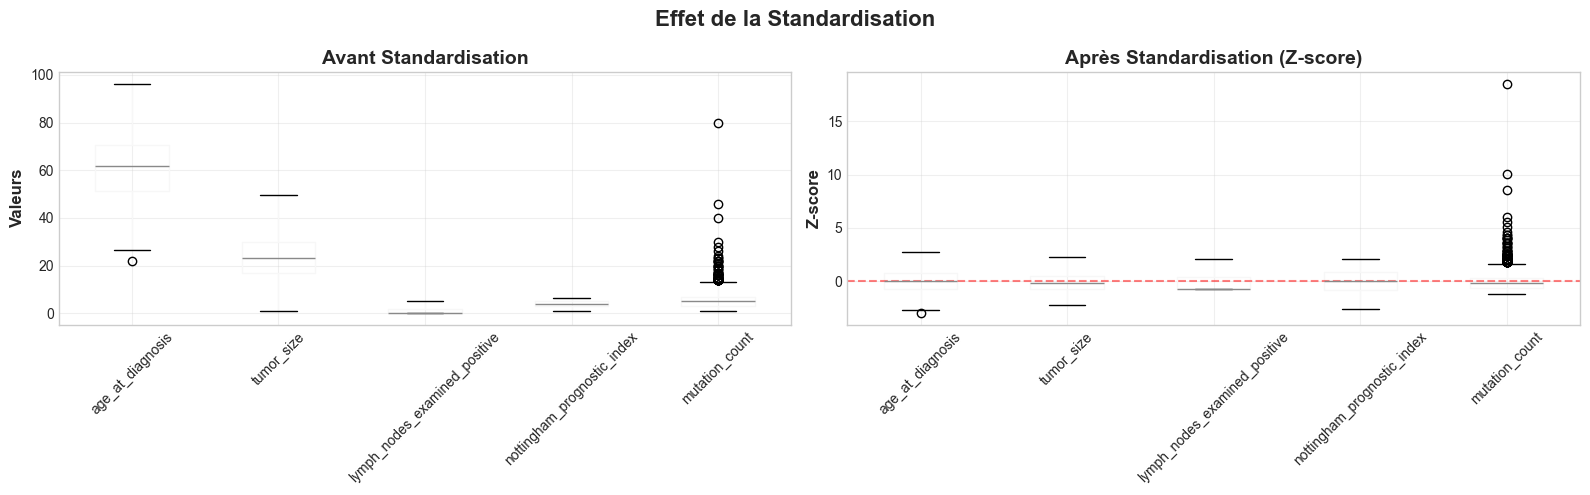


✅ Standardisation terminée!


In [18]:
print("\n" + "="*80)
print("📏 STANDARDISATION DES FEATURES")
print("="*80)

# Note: On sauvegarde les données NON standardisées aussi pour visualisations
X_metabric_raw = X_metabric.copy()

# Standardisation (Z-score)
scaler = StandardScaler()
X_metabric_scaled = scaler.fit_transform(X_metabric)

# Reconvertir en DataFrame
X_metabric_scaled = pd.DataFrame(
    X_metabric_scaled,
    columns=X_metabric.columns,
    index=X_metabric.index
)

print(f"\n✅ Standardisation appliquée:")
print(f"\n   Avant standardisation:")
print(f"      Moyenne: {X_metabric_raw.mean().mean():.2f}")
print(f"      Std:     {X_metabric_raw.std().mean():.2f}")

print(f"\n   Après standardisation:")
print(f"      Moyenne: {X_metabric_scaled.mean().mean():.2e}")
print(f"      Std:     {X_metabric_scaled.std().mean():.2f}")

# Visualiser avant/après
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Effet de la Standardisation', fontsize=16, fontweight='bold')

# Avant
sample_cols = X_metabric_raw.columns[:5]
X_metabric_raw[sample_cols].boxplot(ax=axes[0])
axes[0].set_title('Avant Standardisation', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Valeurs', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(alpha=0.3)

# Après
X_metabric_scaled[sample_cols].boxplot(ax=axes[1])
axes[1].set_title('Après Standardisation (Z-score)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Z-score', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(0, color='red', linestyle='--', alpha=0.5)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Standardisation terminée!")


📊 VISUALISATIONS FINALES

📊 VIZ 1: Distribution des features clés...


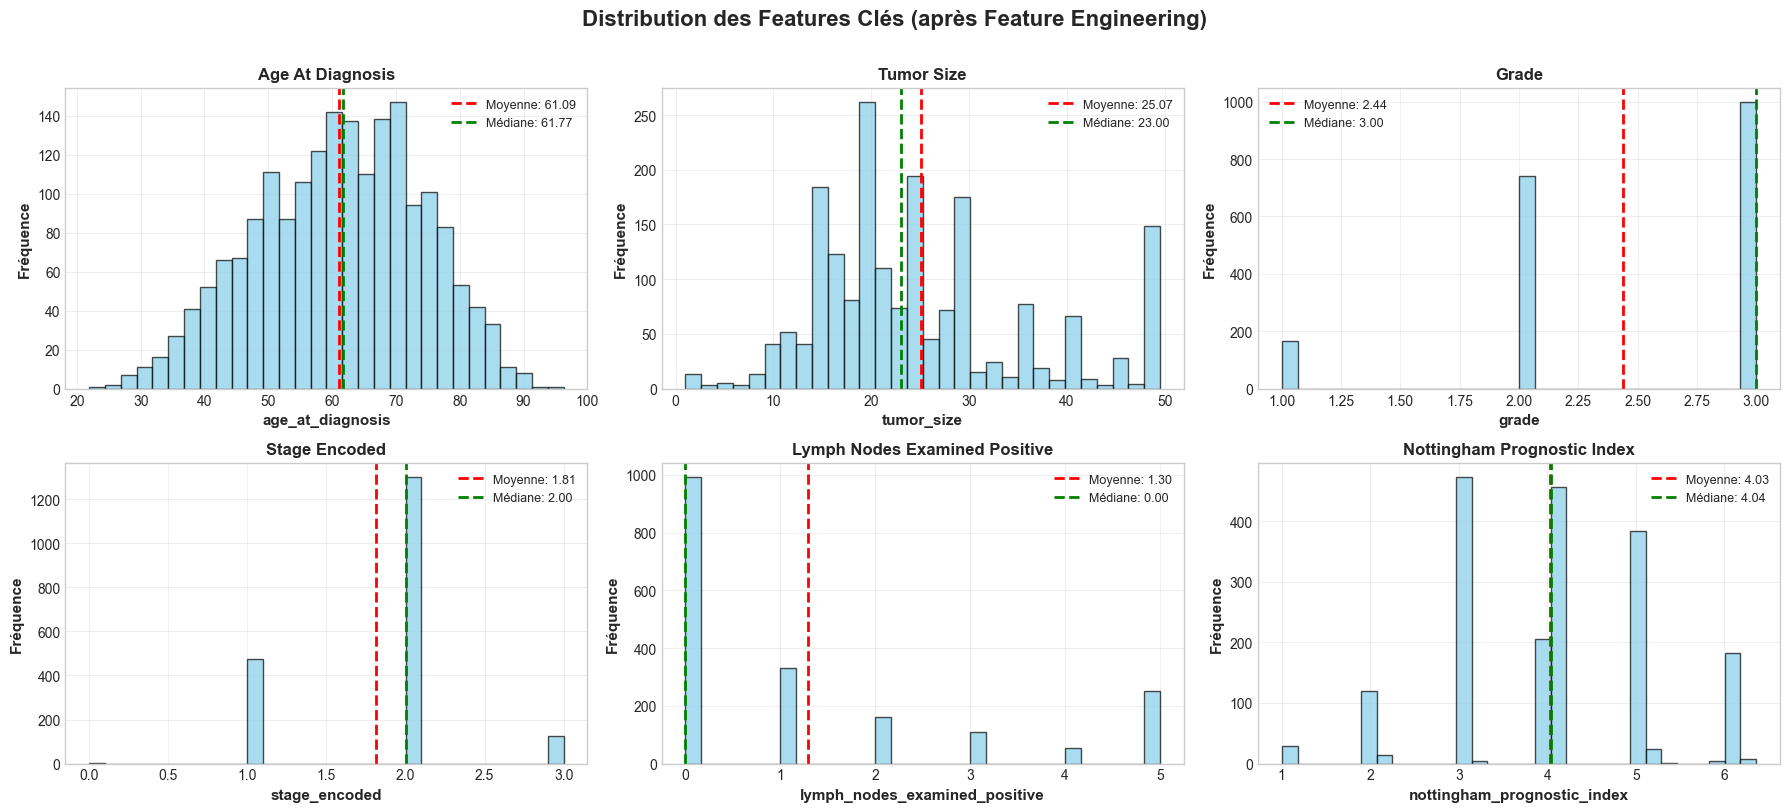


📊 VIZ 2: Relation Features Dérivées vs Variables Cibles...


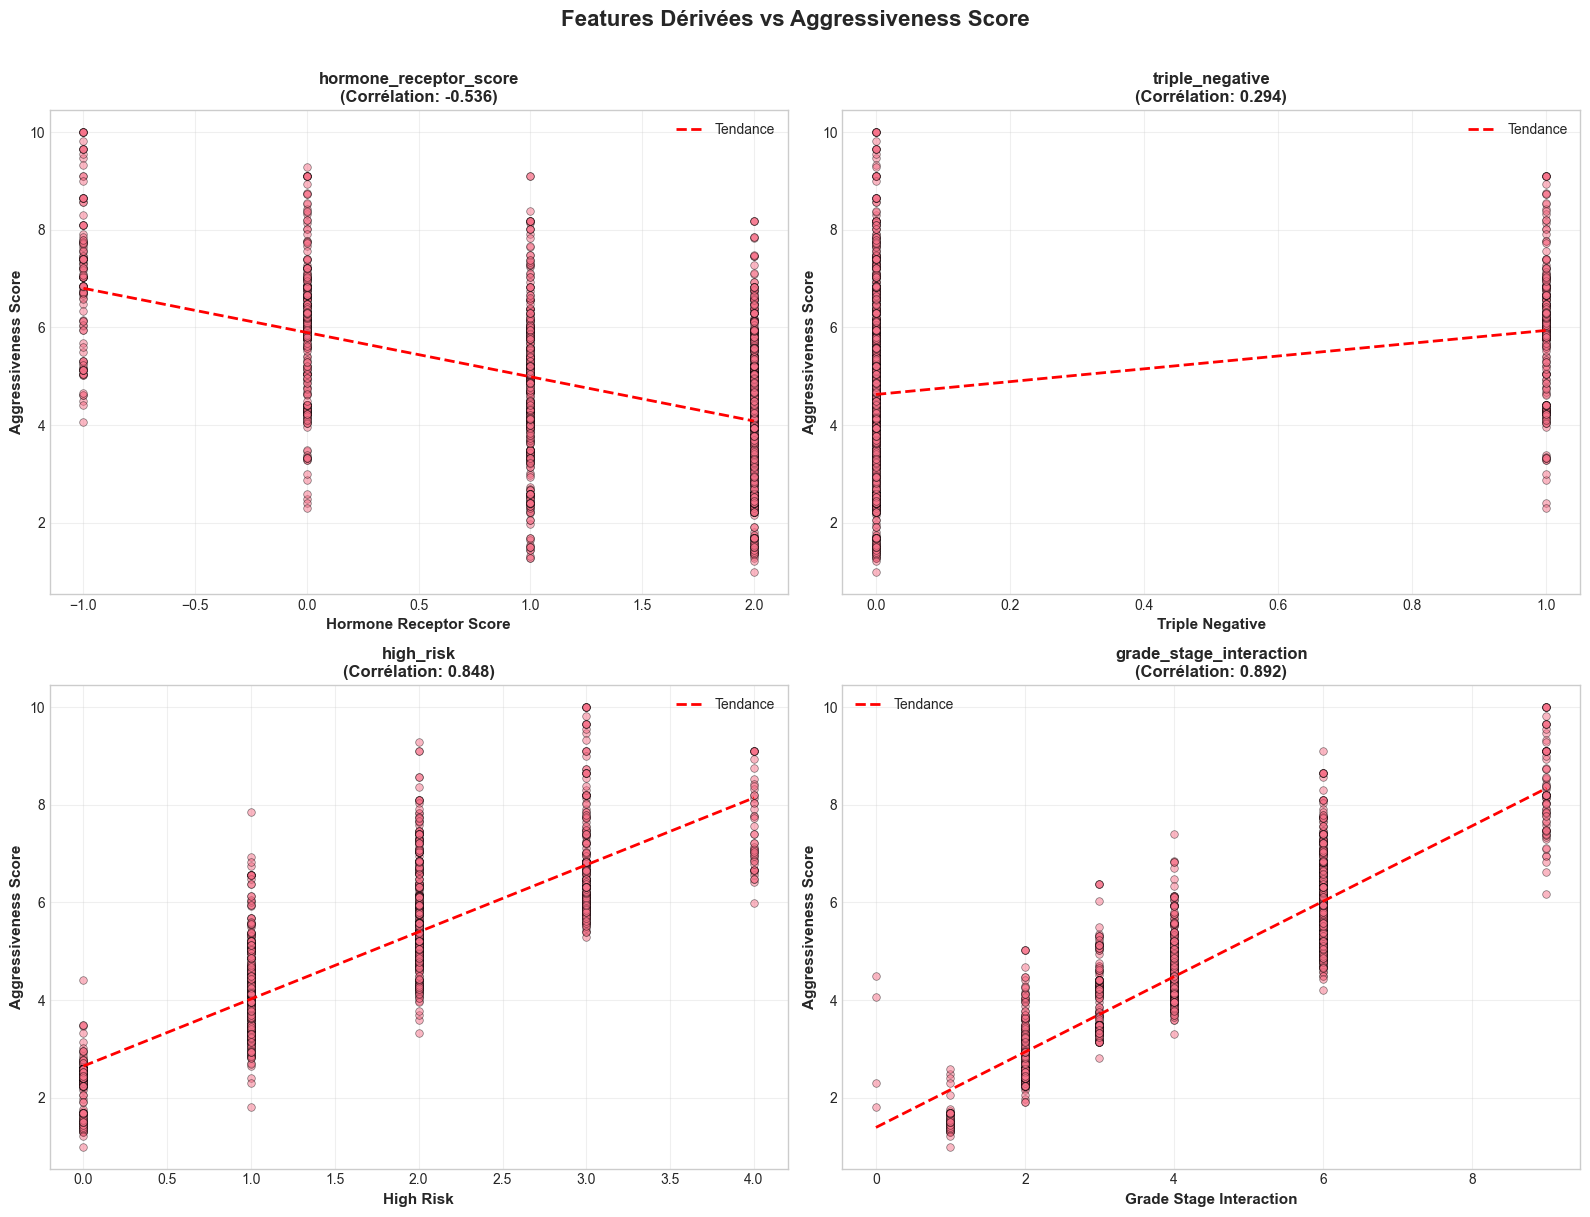


📊 VIZ 3: Corrélation Features vs Variables Cibles...


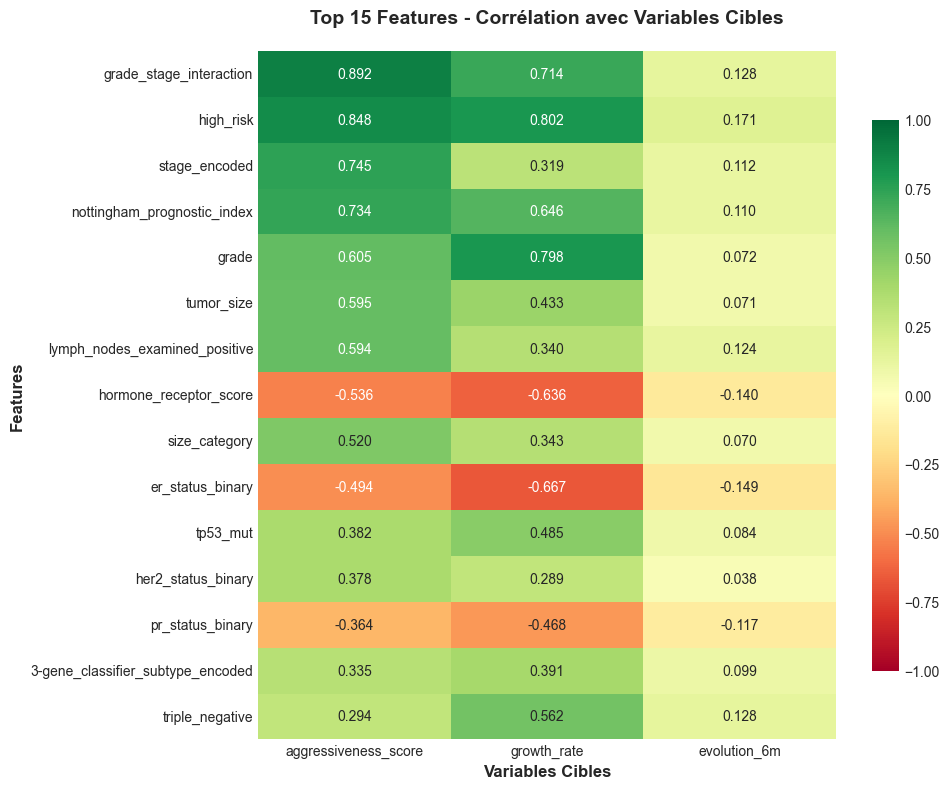


✅ Top 5 features corrélées avec Aggressiveness Score:
   1. grade_stage_interaction                 :  0.892
   2. high_risk                               :  0.848
   3. stage_encoded                           :  0.745
   4. nottingham_prognostic_index             :  0.734
   5. grade                                   :  0.605

📊 VIZ 4: Distribution des Variables Cibles...


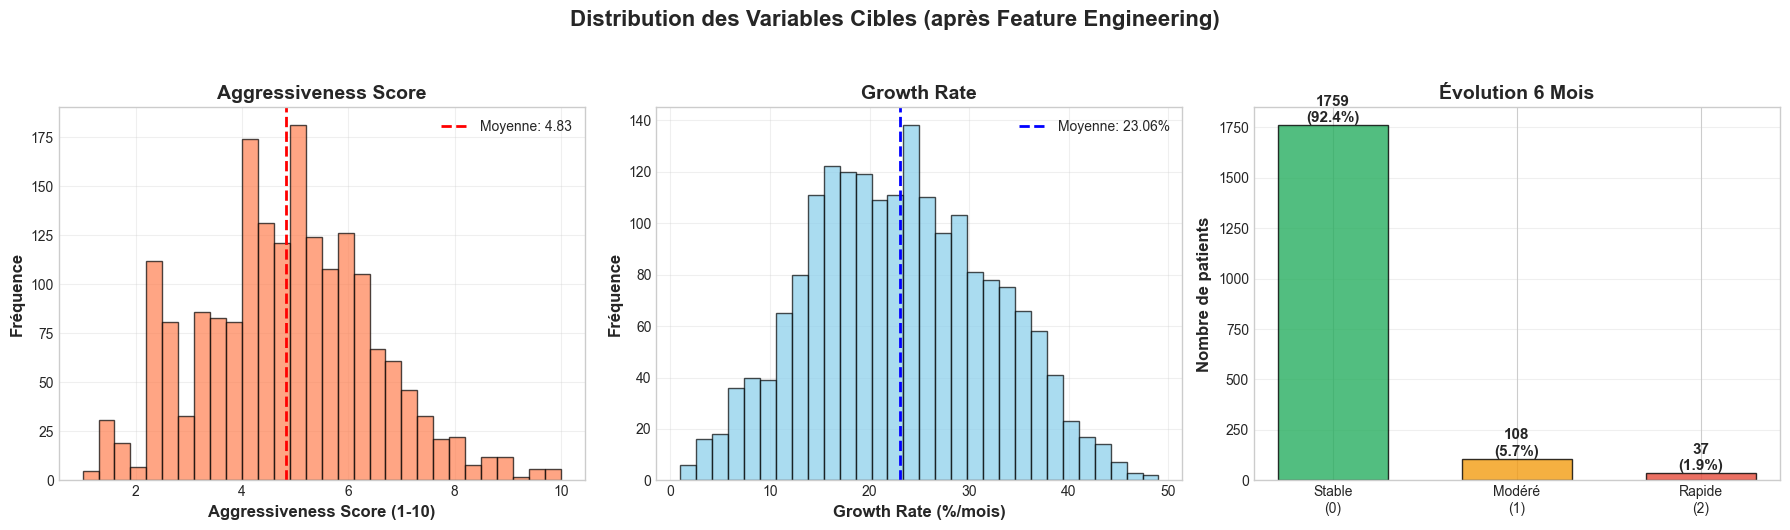


📊 VIZ 5: Pairplot des features importantes...


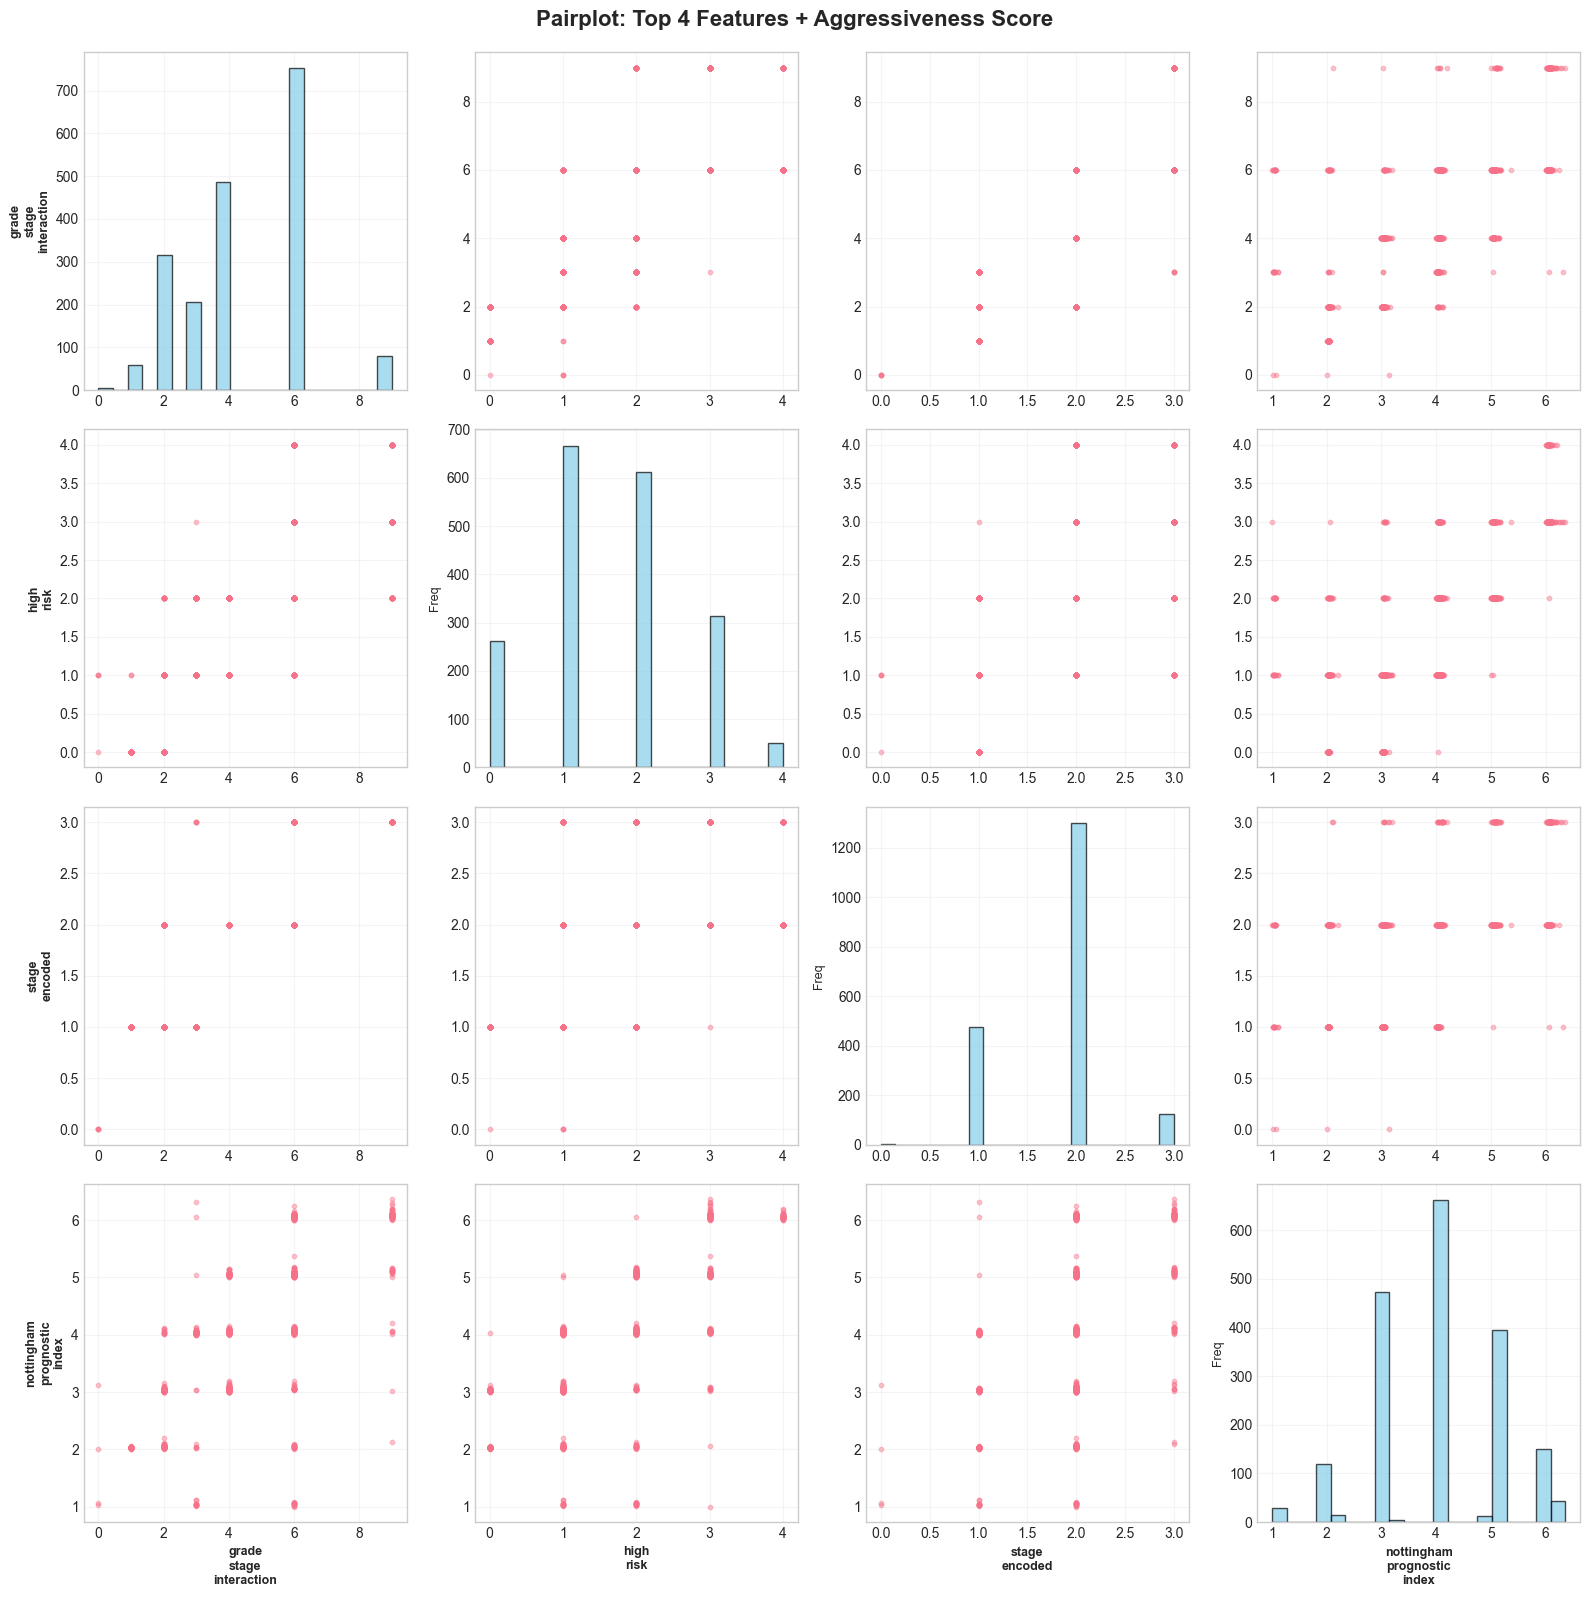


✅ Visualisations finales terminées!


In [19]:
print("\n" + "="*80)
print("📊 VISUALISATIONS FINALES")
print("="*80)

# ═══════════════════════════════════════════════════════════════════════════
# VIZ 1: Distribution des features clés
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 VIZ 1: Distribution des features clés...")

key_features = [
    'age_at_diagnosis',
    'tumor_size',
    'grade',
    'stage_encoded',
    'lymph_nodes_examined_positive',
    'nottingham_prognostic_index'
]

available_key = [f for f in key_features if f in X_metabric_raw.columns]

n_plots = len(available_key)
n_rows = (n_plots + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows*4))
fig.suptitle('Distribution des Features Clés (après Feature Engineering)', 
             fontsize=16, fontweight='bold', y=1.01)

axes = axes.flatten() if n_plots > 1 else [axes]

for idx, feat in enumerate(available_key):
    ax = axes[idx]
    
    data = X_metabric_raw[feat].dropna()
    
    ax.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    ax.axvline(data.mean(), color='red', linestyle='--', linewidth=2, 
              label=f'Moyenne: {data.mean():.2f}')
    ax.axvline(data.median(), color='green', linestyle='--', linewidth=2,
              label=f'Médiane: {data.median():.2f}')
    
    ax.set_xlabel(feat, fontsize=11, fontweight='bold')
    ax.set_ylabel('Fréquence', fontsize=11, fontweight='bold')
    ax.set_title(feat.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(alpha=0.3)

# Supprimer axes vides
for idx in range(len(available_key), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# ═══════════════════════════════════════════════════════════════════════════
# VIZ 2: Features dérivées vs Targets
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 VIZ 2: Relation Features Dérivées vs Variables Cibles...")

derived_features = [
    'hormone_receptor_score',
    'triple_negative',
    'high_risk',
    'grade_stage_interaction'
]

available_derived = [f for f in derived_features if f in X_metabric_raw.columns]

if len(available_derived) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Features Dérivées vs Aggressiveness Score', 
                 fontsize=16, fontweight='bold', y=1.01)
    
    axes = axes.flatten()
    
    for idx, feat in enumerate(available_derived[:4]):
        ax = axes[idx]
        
        # Joindre feature avec target
        plot_data = pd.DataFrame({
            'feature': X_metabric_raw[feat],
            'target': y_metabric['aggressiveness_score']
        }).dropna()
        
        # Scatter plot
        ax.scatter(plot_data['feature'], plot_data['target'], 
                  alpha=0.5, s=30, edgecolors='black', linewidth=0.5)
        
        # Ligne de tendance
        z = np.polyfit(plot_data['feature'], plot_data['target'], 1)
        p = np.poly1d(z)
        ax.plot(plot_data['feature'].sort_values(), 
               p(plot_data['feature'].sort_values()),
               "r--", linewidth=2, label='Tendance')
        
        # Corrélation
        corr = plot_data.corr().iloc[0, 1]
        
        ax.set_xlabel(feat.replace('_', ' ').title(), fontsize=11, fontweight='bold')
        ax.set_ylabel('Aggressiveness Score', fontsize=11, fontweight='bold')
        ax.set_title(f'{feat}\n(Corrélation: {corr:.3f})', 
                    fontsize=12, fontweight='bold')
        ax.legend()
        ax.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# ═══════════════════════════════════════════════════════════════════════════
# VIZ 3: Heatmap Features vs Targets
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 VIZ 3: Corrélation Features vs Variables Cibles...")

# Combiner X et y pour calcul corrélation
combined = pd.concat([X_metabric_raw, y_metabric], axis=1)

# Calculer corrélation features vs targets
target_corr = combined.corr()[['aggressiveness_score', 'growth_rate', 'evolution_6m']].iloc[:-3]

# Trier par corrélation absolue avec aggressiveness_score
target_corr['abs_corr'] = target_corr['aggressiveness_score'].abs()
target_corr = target_corr.sort_values('abs_corr', ascending=False).drop('abs_corr', axis=1)

# Top 15 features
top_features = target_corr.head(15)

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(top_features, annot=True, fmt='.3f', cmap='RdYlGn', center=0,
           cbar_kws={"shrink": 0.8}, ax=ax, vmin=-1, vmax=1)

ax.set_title('Top 15 Features - Corrélation avec Variables Cibles', 
            fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Variables Cibles', fontsize=12, fontweight='bold')
ax.set_ylabel('Features', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✅ Top 5 features corrélées avec Aggressiveness Score:")
for i, (feat, corr) in enumerate(top_features['aggressiveness_score'].head().items(), 1):
    print(f"   {i}. {feat:40s}: {corr:6.3f}")

# ═══════════════════════════════════════════════════════════════════════════
# VIZ 4: Distribution des variables cibles
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 VIZ 4: Distribution des Variables Cibles...")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution des Variables Cibles (après Feature Engineering)', 
             fontsize=16, fontweight='bold', y=1.05)

# Aggressiveness Score
axes[0].hist(y_metabric['aggressiveness_score'], bins=30, 
            color='coral', edgecolor='black', alpha=0.7)
axes[0].axvline(y_metabric['aggressiveness_score'].mean(), 
               color='red', linestyle='--', linewidth=2, 
               label=f"Moyenne: {y_metabric['aggressiveness_score'].mean():.2f}")
axes[0].set_xlabel('Aggressiveness Score (1-10)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Fréquence', fontsize=12, fontweight='bold')
axes[0].set_title('Aggressiveness Score', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Growth Rate
axes[1].hist(y_metabric['growth_rate'], bins=30, 
            color='skyblue', edgecolor='black', alpha=0.7)
axes[1].axvline(y_metabric['growth_rate'].mean(), 
               color='blue', linestyle='--', linewidth=2,
               label=f"Moyenne: {y_metabric['growth_rate'].mean():.2f}%")
axes[1].set_xlabel('Growth Rate (%/mois)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Fréquence', fontsize=12, fontweight='bold')
axes[1].set_title('Growth Rate', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Evolution 6M
evol_counts = y_metabric['evolution_6m'].value_counts().sort_index()
colors = ['#27ae60', '#f39c12', '#e74c3c']
bars = axes[2].bar(['Stable\n(0)', 'Modéré\n(1)', 'Rapide\n(2)'], 
                   evol_counts.values, color=colors, 
                   edgecolor='black', alpha=0.8, width=0.6)

# Ajouter valeurs sur barres
for bar in bars:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}\n({height/len(y_metabric)*100:.1f}%)',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

axes[2].set_ylabel('Nombre de patients', fontsize=12, fontweight='bold')
axes[2].set_title('Évolution 6 Mois', fontsize=14, fontweight='bold')
axes[2].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ═══════════════════════════════════════════════════════════════════════════
# VIZ 5: Pairplot des features les plus importantes
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 VIZ 5: Pairplot des features importantes...")

# Sélectionner top 4 features + target
top_4_features = top_features.index[:4].tolist()
pairplot_data = pd.concat([
    X_metabric_raw[top_4_features],
    y_metabric['aggressiveness_score']
], axis=1)

# Créer pairplot manuel (seaborn pairplot peut être lent)
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('Pairplot: Top 4 Features + Aggressiveness Score', 
             fontsize=16, fontweight='bold', y=0.995)

cols = pairplot_data.columns

for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        
        if i == j:
            # Diagonale: histogramme
            ax.hist(pairplot_data[cols[i]], bins=20, 
                   color='skyblue', edgecolor='black', alpha=0.7)
            ax.set_ylabel('Freq', fontsize=9)
        else:
            # Hors diagonale: scatter
            ax.scatter(pairplot_data[cols[j]], pairplot_data[cols[i]], 
                      alpha=0.4, s=10)
        
        # Labels
        if i == 3:
            ax.set_xlabel(cols[j].replace('_', '\n'), fontsize=9, fontweight='bold')
        if j == 0:
            ax.set_ylabel(cols[i].replace('_', '\n'), fontsize=9, fontweight='bold')
        
        ax.grid(alpha=0.2)

plt.tight_layout()
plt.show()

print("\n✅ Visualisations finales terminées!")

In [20]:
import os
from datetime import datetime

print("\n" + "="*80)
print("💾 EXPORT DES DONNÉES NETTOYÉES")
print("="*80)

# ════════════════════════════════════════════════════════════════════════
# Vérifier le dossier data/row
# ════════════════════════════════════════════════════════════════════════

# Chemin vers le dossier data/row
data_folder = os. path.join('data', 'row')

# Vérifier/créer le dossier
if not os.path.exists(data_folder):
    os. makedirs(data_folder)
    print(f"✅ Dossier créé : {data_folder}")
else:
    print(f"✅ Dossier existant : {data_folder}")

# Afficher chemin complet
full_path = os.path.abspath(data_folder)
print(f"📁 Chemin complet : {full_path}")
# ════════════════════════════════════════════════════════════════════════
# Identifier les variables à exporter
# ════════════════════════════════════════════════════════════════════════

print(f"\n🔍 Identification des variables...")

# Chercher X (features)
X_to_export = None
X_var_name = None

if 'X_metabric_raw' in globals():
    X_to_export = X_metabric_raw.copy()
    X_var_name = 'X_metabric_raw'
    print(f"   ✅ Features trouvées : X_metabric_raw (NON standardisé) ⭐")
elif 'X_metabric' in globals() and 'X_metabric_scaled' in globals():
    # Si les deux existent, préférer la version non-scalée
    X_to_export = X_metabric. copy()
    X_var_name = 'X_metabric'
    print(f"   ✅ Features trouvées : X_metabric (NON standardisé) ⭐")
elif 'X_metabric' in globals():
    X_to_export = X_metabric.copy()
    X_var_name = 'X_metabric'
    print(f"   ✅ Features trouvées : X_metabric")
elif 'X_metabric_scaled' in globals():
    X_to_export = X_metabric_scaled.copy()
    X_var_name = 'X_metabric_scaled'
    print(f"   ⚠️ Features trouvées : X_metabric_scaled (déjà standardisé)")
    print(f"      Note : Préférable d'avoir version NON standardisée")
else:
    print(f"   ❌ ERREUR : Aucune variable X trouvée !")

# Chercher y (cibles)
y_to_export = None
y_var_name = None

if 'y_metabric' in globals():
    y_to_export = y_metabric.copy()
    y_var_name = 'y_metabric'
    print(f"   ✅ Cibles trouvées : y_metabric")
else:
    print(f"   ❌ ERREUR : Variable y_metabric introuvable !")

# ════════════════════════════════════════════════════════════════════════
# Créer le dataset combiné
# ════════════════════════════════════════════════════════════════════════

if X_to_export is not None and y_to_export is not None:
    
    print(f"\n📦 Création du dataset combiné...")
    
    # Vérifier alignement des index
    if not X_to_export.index. equals(y_to_export. index):
        print(f"   ⚠️ Les index ne correspondent pas, réalignement...")
        y_to_export = y_to_export.loc[X_to_export.index]
    
    # Combiner X + y
    metabric_clean = pd.concat([X_to_export, y_to_export], axis=1)
    
    print(f"\n✅ Dataset combiné créé :")
    print(f"   📊 Shape totale : {metabric_clean.shape}")
    print(f"   👥 Patients : {metabric_clean. shape[0]}")
    print(f"   📋 Colonnes totales : {metabric_clean.shape[1]}")
    print(f"      ├─ Features : {X_to_export. shape[1]}")
    print(f"      └─ Cibles : {y_to_export.shape[1]}")
    
   # ════════════════════════════════════════════════════════════════════
    # Export du fichier principal dans data/row
    # ════════════════════════════════════════════════════════════════════
    
    filename = os.path.join(data_folder, 'metabric_clean.csv')
    
    print(f"\n💾 Export en cours vers : {filename}")
    metabric_clean.to_csv(filename, index=True)
    
    file_size_kb = os.path.getsize(filename) / 1024
    file_size_mb = file_size_kb / 1024
    
    print(f"\n✅ FICHIER PRINCIPAL SAUVEGARDÉ !")
    print(f"   📁 Fichier : metabric_clean.csv")
    print(f"   📂 Dossier : data/row/")
    print(f"   📊 Shape : {metabric_clean. shape}")
    print(f"   💾 Taille : {file_size_kb:.1f} KB ({file_size_mb:.2f} MB)")
    
    # ════════════════════════════════════════════════════════════════════
    # Backup avec timestamp
    # ════════════════════════════════════════════════════════════════════
    
    timestamp = datetime.now(). strftime('%Y%m%d_%H%M%S')
    backup_filename = os.path.join(data_folder, f'metabric_clean_{timestamp}.csv')
    metabric_clean.to_csv(backup_filename, index=True)
    print(f"   📦 Backup créé : metabric_clean_{timestamp}.csv")
    
    # ════════════════════════════════════════════════════════════════════
    # Créer fichier d'informations
    # ════════════════════════════════════════════════════════════════════
    
    info_filename = os. path.join(data_folder, 'metabric_clean_info.txt')
    
    with open(info_filename, 'w', encoding='utf-8') as f:
        f.write("═══════════════════════════════════════════════════════════════════\n")
        f.write("    DONNÉES METABRIC NETTOYÉES - INFORMATIONS\n")
        f. write("═══════════════════════════════════════════════════════════════════\n\n")
        
        f.write(f"📅 Date d'export : {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write(f"📂 Fichier : metabric_clean.csv\n")
        f.write(f"📊 Shape : {metabric_clean.shape}\n\n")
        
        f. write("─" * 70 + "\n")
        f. write("📋 STRUCTURE DU DATASET\n")
        f.write("─" * 70 + "\n\n")
        
        f.write(f"FEATURES ({X_to_export.shape[1]} colonnes) :\n\n")
        for i, col in enumerate(X_to_export.columns, 1):
            f.write(f"  {i:2d}. {col}\n")
        
        f.write(f"\nCIBLES ({y_to_export.shape[1]} colonnes) :\n\n")
        for i, col in enumerate(y_to_export.columns, 1):
            f.write(f"  {i}. {col}\n")
        
        f.write("\n" + "─" * 70 + "\n")
        f.write("⚠️ IMPORTANT\n")
        f.write("─" * 70 + "\n\n")
        
        if 'scaled' in X_var_name. lower():
            f.write("⚠️ Les features sont DÉJÀ STANDARDISÉES\n")
            f.write("   → Pas besoin de standardiser à nouveau\n")
            f.write("   → Split puis entraîner directement\n\n")
        else:
            f.write("✅ Les features sont NON STANDARDISÉES\n")
            f.write("   → La standardisation doit être faite APRÈS le split train/test\n")
            f.write("   → Cela évite le data leakage\n\n")
        
        f.write("─" * 70 + "\n")
        f.write("📊 PRÉPARATION APPLIQUÉE\n")
        f.write("─" * 70 + "\n\n")
        
        f.write("  ✅ Nettoyage (valeurs manquantes, outliers)\n")
        f.write("  ✅ Feature Engineering (features dérivées)\n")
        f. write("  ✅ Encodage des variables catégorielles\n")
        f.write("  ✅ Création des 3 variables cibles\n")
        f. write("  ✅ Sélection des features finales\n")
        f.write("  ✅ Analyse de corrélation\n\n")
        
        f. write("─" * 70 + "\n")
        f. write("🚀 UTILISATION (Notebook de Modélisation)\n")
        f.write("─" * 70 + "\n\n")
        
        f.write("import pandas as pd\n")
        f.write("from sklearn.model_selection import train_test_split\n")
        f.write("from sklearn.preprocessing import StandardScaler\n\n")
        
        f.write("# 1. Charger les données\n")
        f.write("data = pd. read_csv('data/metabric_clean.csv', index_col=0)\n\n")
        
        f.write("# 2.  Séparer features (X) et cibles (y)\n")
        f.write("target_cols = ['aggressiveness_score', 'growth_rate', 'evolution_6m']\n")
        f.write("X = data. drop(columns=target_cols)\n")
        f.write("y = data[target_cols]\n\n")
        
        f.write("# 3. Split Train/Test (80/20)\n")
        f.write("X_train, X_test, y_train, y_test = train_test_split(\n")
        f.write("    X, y, test_size=0.2, random_state=42,\n")
        f.write("    stratify=y['evolution_6m']\n")
        f.write(")\n\n")
        
        if 'scaled' not in X_var_name.lower():
            f.write("# 4. Standardisation (APRÈS le split)\n")
            f. write("scaler = StandardScaler()\n")
            f.write("X_train_scaled = scaler. fit_transform(X_train)\n")
            f.write("X_test_scaled = scaler.transform(X_test)\n\n")
            f.write("# Reconvertir en DataFrame\n")
            f.write("X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)\n")
            f.write("X_test_scaled = pd. DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)\n\n")
        
        f.write("# 5.  Entraîner vos modèles\n")
        f.write("# model. fit(X_train_scaled, y_train)\n")
    
    print(f"   📄 Fichier d'infos : metabric_clean_info.txt")
    
    
    # ════════════════════════════════════════════════════════════════════
    # Afficher aperçu des premières lignes
    # ════════════════════════════════════════════════════════════════════
    
    print(f"\n📊 Aperçu des données (5 premières lignes) :\n")
    print(metabric_clean.head())
    
    print(f"\n📋 Colonnes sauvegardées ({len(metabric_clean.columns)}) :\n")
    print(f"   Features : {list(X_to_export.columns[:5])} ...  (+{X_to_export.shape[1]-5} autres)")
    print(f"   Cibles : {list(y_to_export.columns)}")
    
else:
    print("\n❌ ERREUR : Impossible de créer le dataset")
    print("   Vérifiez que X_metabric et y_metabric existent")

print("\n" + "="*80)


💾 EXPORT DES DONNÉES NETTOYÉES
✅ Dossier existant : data\row
📁 Chemin complet : c:\Users\maram\Desktop\Breast_Cancer_Detection_ML_Project\Notebooks\Modeling\DSO3_Speed_Progression_Prediction\data\row

🔍 Identification des variables...
   ✅ Features trouvées : X_metabric_raw (NON standardisé) ⭐
   ✅ Cibles trouvées : y_metabric

📦 Création du dataset combiné...

✅ Dataset combiné créé :
   📊 Shape totale : (1904, 27)
   👥 Patients : 1904
   📋 Colonnes totales : 27
      ├─ Features : 24
      └─ Cibles : 3

💾 Export en cours vers : data\row\metabric_clean.csv

✅ FICHIER PRINCIPAL SAUVEGARDÉ !
   📁 Fichier : metabric_clean.csv
   📂 Dossier : data/row/
   📊 Shape : (1904, 27)
   💾 Taille : 200.8 KB (0.20 MB)
   📦 Backup créé : metabric_clean_20251205_114050.csv
   📄 Fichier d'infos : metabric_clean_info.txt

📊 Aperçu des données (5 premières lignes) :

   age_at_diagnosis  tumor_size  lymph_nodes_examined_positive  \
0             75.65        22.0                            5.0   
1    